In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import os

#BUILD DATAFRAME WHERE EVERY CELL IS A STATISTICAL CASE


main = r'D:\VASCO\kaksoset\data'

newdf=pd.DataFrame(columns = ['Subject', 'Family', 'Gender', 'Zygotic', 'Active', 'HealthScore'])
for subject_folder in os.listdir(main):
    directory = "{}\{}".format(main, subject_folder)
    if 'x' not in directory and '.tif' not in directory:
        
        for filename in os.listdir(directory):
            if filename[-3:] == 'txt':
                with open(os.path.join(directory, filename), 'r') as f:                
                    data = f.read()
                    subject = data.split('\n')[0].split()[1]
                    family = data.split('\n')[1].split()[1]
                    zygot = data.split('\n')[2].split()[1]
                    active = data.split('\n')[3].split()[1]
                    gender = data.split('\n')[4].split()[1]
                    health = data.split('\n')[5].split()[1]                    
        
       
        for filename in os.listdir(directory):         
            if filename[-3:] == 'csv':
                if subject == directory[-5:]:
                    datafile = "{}\{}".format(directory, filename)
                    cur_df = pd.read_csv (datafile ,index_col=False)
                    cur_df['Subject'] = subject
                    cur_df['Family'] = family
                    cur_df['Gender'] = gender
                    cur_df['Zygotic'] = zygot
                    cur_df['Activity'] = active
                    cur_df['HealthScore'] = float(health)
                    
                    newdf = pd.concat([newdf, cur_df], axis=0) 
                    

                else:
                    print('there is an error. Your subject folder does not match the subject in profile.txt')

                
                
# shift some columns position for later ease in coding
x = newdf.pop('Cell_ID')
y = newdf.pop('PLIN_stained')
z = newdf.pop('HealthScore')
a = newdf.pop('FiberType')
b = newdf.pop('Activity')
newdf.pop('Active')
c = newdf.pop('Family')


# insert column using insert(position,column_name,first_column) function
newdf.insert(0, x.name, x)
newdf.insert(7, y.name, y)
newdf.insert(2, z.name, z)
newdf.insert(4, a.name, a)
newdf.insert(3, b.name, b)
newdf.insert(2, c.name, c)



#renumber indexes
newdf = newdf.reset_index(drop=True)

final_df = newdf.iloc[:,0:13].copy()
for plin in ['PLIN2', 'PLIN5']:    
    for var in newdf.columns[13:]:
        final_df[var.replace('PLIN', plin)] = newdf[var][newdf['PLIN_stained']==plin.lower()]
final_df.pop('PLIN_stained')
        
cells_df = final_df

cells_df['Activity'] = cells_df['Activity'].str.capitalize()

ready_dataframe = r'D:\VASCO\kaksoset\data\x_ready_dataframe_Mean.pkl'
cells_df.to_pickle(ready_dataframe)  # where to save it, usually as a .pkl

cells_df

C:\Devel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


Cell_ID Subject Family  HealthScore  Activity  Gender FiberType  \
0    0001-0122  62928   56452  1.69         Inactive  male    Type I     
1    0002-0086  62928   56452  1.69         Inactive  male    Type I     
2    0003-0108  62928   56452  1.69         Inactive  male    Type II    
3    0004-0128  62928   56452  1.69         Inactive  male    Type I     
4    0005-0211  62928   56452  1.69         Inactive  male    Type II    
5    0006-0240  62928   56452  1.69         Inactive  male    Type II    
6    0007-0301  62928   56452  1.69         Inactive  male    Type I     
7    0008-0323  62928   56452  1.69         Inactive  male    Type II    
8    0009-0372  62928   56452  1.69         Inactive  male    Type II    
9    0010-0513  62928   56452  1.69         Inactive  male    Type I     
10   0011-0531  62928   56452  1.69         Inactive  male    Type I     
11   0012-0642  62928   56452  1.69         Inactive  male    Type II    
12   0013-0716  62928   56452  1.69         Inactive  male    Type II    
13   0014-0721  62928   56452  1.69         Inactive  male    Type I     
14   0015-0850  62928   56452  1.69         Inactive  male    Type II    
15   0016-0884  62928   56452  1.69         Inactive  male    Type II    
16   0017-0925  62928   56452  1.69         Inactive  male    Type I     
17   0001-0113  62928   56452  1.69         Inactive  male    Type I     
18   0002-0149  62928   56452  1.69         Inactive  male    Type II    
19   0003-0170  62928   56452  1.69         Inactive  male    Type I     
20   0004-0216  62928   56452  1.69         Inactive  male    Type I     
21   0005-0284  62928   56452  1.69         Inactive  male    Type II    
22   0006-0290  62928   56452  1.69         Inactive  male    Type II    
23   0007-0361  62928   56452  1.69         Inactive  male    Type I     
24   0008-0370  62928   56452  1.69         Inactive  male    Type II    
25   0009-0447  62928   56452  1.69         Inactive  male    Type II    
26   0010-0561  62928   56452  1.69         Inactive  male    Type I     
27   0011-0610  62928   56452  1.69         Inactive  male    Type I     
28   0012-0591  62928   56452  1.69         Inactive  male    Type I     
29   0013-0699  62928   56452  1.69         Inactive  male    Type II    
30   0014-0819  62928   56452  1.69         Inactive  male    Type I     
31   0015-0759  62928   56452  1.69         Inactive  male    Type II    
32   0016-0775  62928   56452  1.69         Inactive  male    Type I     
33   0017-0894  62928   56452  1.69         Inactive  male    Type I     
34   0018-0917  62928   56452  1.69         Inactive  male    Type II    
35   0019-0948  62928   56452  1.69         Inactive  male    Type I     
36   0001-0205  65738   57855  1.70         Inactive  male    Type I     
37   0002-0077  65738   57855  1.70         Inactive  male    Type II    
38   0003-0097  65738   57855  1.70         Inactive  male    Type II    
39   0004-0229  65738   57855  1.70         Inactive  male    Type I     
40   0005-0307  65738   57855  1.70         Inactive  male    Type I     
41   0006-0321  65738   57855  1.70         Inactive  male    Type I     
42   0007-0432  65738   57855  1.70         Inactive  male    Type II    
43   0008-0597  65738   57855  1.70         Inactive  male    Type I     
44   0009-0710  65738   57855  1.70         Inactive  male    Type I     
45   0010-0689  65738   57855  1.70         Inactive  male    Type I     
46   0011-0877  65738   57855  1.70         Inactive  male    Type II    
47   0012-0893  65738   57855  1.70         Inactive  male    Type I     
48   0013-0921  65738   57855  1.70         Inactive  male    Type II    
49   0001-0099  65738   57855  1.70         Inactive  male    Type II    
50   0002-0135  65738   57855  1.70         Inactive  male    Type I     
51   0003-0294  65738   57855  1.70         Inactive  male    Type I     
52   0004-0325  65738   57855  1.70         Inactive  male    Type I     
53   0005-0

In [2]:
ready_dataframe = r'D:\VASCO\kaksoset\data\x_ready_dataframe_Mean.pkl'
cells_df = pd.read_pickle(ready_dataframe) #to load it

twinPairDT=pd.DataFrame()

for i in cells_df['Family'].unique():
    if len(cells_df['Subject'][cells_df['Family'] == i].unique()) > 1:
        print('These subjects {} are a real twin pair and belong to family {}. They are a {} pair'.format(cells_df['Subject'][cells_df['Family'] == i].unique(), i, cells_df['Zygotic'][cells_df['Family'] == i].unique()[0]))
        print('adding them to a separate table')
        twinPairDT = pd.concat([twinPairDT, cells_df[cells_df['Family'] == i]], axis=0)
        
twinPairDT

These subjects ['65738' '65739'] are a real twin pair and belong to family 57855. They are a dizygotic pair
adding them to a separate table
These subjects ['75001' '75002'] are a real twin pair and belong to family 62478. They are a monozygotic pair
adding them to a separate table
These subjects ['76816' '76817'] are a real twin pair and belong to family 63384. They are a dizygotic pair
adding them to a separate table
These subjects ['82601' '82602'] are a real twin pair and belong to family 66268. They are a monozygotic pair
adding them to a separate table


Cell_ID Subject Family  HealthScore  Activity  Gender FiberType  \
36   0001-0205  65738   57855  1.70         Inactive  male    Type I     
37   0002-0077  65738   57855  1.70         Inactive  male    Type II    
38   0003-0097  65738   57855  1.70         Inactive  male    Type II    
39   0004-0229  65738   57855  1.70         Inactive  male    Type I     
40   0005-0307  65738   57855  1.70         Inactive  male    Type I     
41   0006-0321  65738   57855  1.70         Inactive  male    Type I     
42   0007-0432  65738   57855  1.70         Inactive  male    Type II    
43   0008-0597  65738   57855  1.70         Inactive  male    Type I     
44   0009-0710  65738   57855  1.70         Inactive  male    Type I     
45   0010-0689  65738   57855  1.70         Inactive  male    Type I     
46   0011-0877  65738   57855  1.70         Inactive  male    Type II    
47   0012-0893  65738   57855  1.70         Inactive  male    Type I     
48   0013-0921  65738   57855  1.70         Inactive  male    Type II    
49   0001-0099  65738   57855  1.70         Inactive  male    Type II    
50   0002-0135  65738   57855  1.70         Inactive  male    Type I     
51   0003-0294  65738   57855  1.70         Inactive  male    Type I     
52   0004-0325  65738   57855  1.70         Inactive  male    Type I     
53   0005-0369  65738   57855  1.70         Inactive  male    Type II    
54   0006-0568  65738   57855  1.70         Inactive  male    Type I     
55   0007-0661  65738   57855  1.70         Inactive  male    Type I     
56   0008-0637  65738   57855  1.70         Inactive  male    Type I     
57   0009-0619  65738   57855  1.70         Inactive  male    Type II    
58   0010-0860  65738   57855  1.70         Inactive  male    Type I     
59   0011-0870  65738   57855  1.70         Inactive  male    Type II    
60   0012-0887  65738   57855  1.70         Inactive  male    Type I     
61   0001-0131  65739   57855  11.65        Active    male    Type II    
62   0002-0210  65739   57855  11.65        Active    male    Type I     
63   0003-0190  65739   57855  11.65        Active    male    Type II    
64   0004-0373  65739   57855  11.65        Active    male    Type I     
65   0005-0408  65739   57855  11.65        Active    male    Type II    
66   0006-0431  65739   57855  11.65        Active    male    Type II    
67   0007-0469  65739   57855  11.65        Active    male    Type I     
68   0008-0607  65739   57855  11.65        Active    male    Type II    
69   0009-0680  65739   57855  11.65        Active    male    Type I     
70   0010-0684  65739   57855  11.65        Active    male    Type II    
71   0011-0867  65739   57855  11.65        Active    male    Type II    
72   0012-0830  65739   57855  11.65        Active    male    Type I     
73   0013-0917  65739   57855  11.65        Active    male    Type II    
74   0001-0103  65739   57855  11.65        Active    male    Type I     
75   0002-0116  65739   57855  11.65        Active    male    Type I     
76   0003-0220  65739   57855  11.65        Active    male    Type II    
77   0004-0278  65739   57855  11.65        Active    male    Type I     
78   0005-0302  65739   57855  11.65        Active    male    Type II    
79   0006-0350  65739   57855  11.65        Active    male    Type II    
80   0007-0477  65739   57855  11.65        Active    male    Type II    
81   0008-0485  65739   57855  11.65        Active    male    Type I     
82   0009-0519  65739   57855  11.65        Active    male    Type II    
83   0010-0609  65739   57855  11.65        Active    male    Type I     
84   0011-0641  65739   57855  11.65        Active    male    Type II    
85   0012-0691  65739   57855  11.65        Active    male    Type II    
86   0013-0751  65739   57855  11.65        Active    male    Type I     
87   0014-0799  65739   57855  11.65        Active    male    Type II    
88   0015-0904  65739   57855  11.65        Active    male    Type I     
89   0016-0

In [3]:
#BUILD DATAFRAME WHERE EVERY INDIVIDUAL IS A STATISTICAL CASE

subjs_df = pd.DataFrame(columns = ['Subject','Family','HealthScore','Activity','Gender','Zygotic',
                                   'LD_signal_density_FT1', 'LD_signal_density_FT2', 'LD_#_density_FT1', 'LD_#_density_FT2',
                                   'LD_AvgSize_FT1', 'LD_AvgSize_FT2', 'PLIN2_signal_density_FT1', 'PLIN2_signal_density_FT2',
                                   'LD_PLIN2_tManders_FT1', 'LD_PLIN2_tManders_FT2','PLIN5_signal_density_FT1', 
                                   'PLIN5_signal_density_FT2', 'LD_PLIN5_tManders_FT1', 'LD_PLIN5_tManders_FT2'])
subjs_df['Subject'] = final_df['Subject'].unique()

pos = 0
for c, case in enumerate(final_df['Subject'].unique()):
    subjs_df['Subject'].iat[c] = final_df['Subject'][final_df['Subject']==case].unique()[0]
    subjs_df['Family'].iat[c] = int(final_df['Family'][final_df['Subject']==case].unique())
    subjs_df['HealthScore'].iat[c] = float(final_df['HealthScore'][final_df['Subject']==case].unique())
    subjs_df['Activity'].iat[c] = final_df['Activity'][final_df['Subject']==case].unique()[0]
    subjs_df['Gender'].iat[c] = final_df['Gender'][final_df['Subject']==case].unique()[0]
    subjs_df['Zygotic'].iat[c] = final_df['Zygotic'][final_df['Subject']==case].unique()[0]
    
    subjs_df['LD_signal_density_FT1'].iat[c] = float(final_df['LD_signal_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['LD_signal_density_FT2'].iat[c] = float(final_df['LD_signal_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    subjs_df['LD_#_density_FT1'].iat[c] = float(final_df['LD_#_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['LD_#_density_FT2'].iat[c] = float(final_df['LD_#_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    subjs_df['LD_AvgSize_FT1'].iat[c] = float(final_df['LD_AvgSize'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['LD_AvgSize_FT2'].iat[c] = float(final_df['LD_AvgSize'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    subjs_df['PLIN2_signal_density_FT1'].iat[c] = float(final_df['PLIN2_signal_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['PLIN2_signal_density_FT2'].iat[c] = float(final_df['PLIN2_signal_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    subjs_df['LD_PLIN2_tManders_FT1'].iat[c] = float(final_df['LD_PLIN2_tManders'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['LD_PLIN2_tManders_FT2'].iat[c] = float(final_df['LD_PLIN2_tManders'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    subjs_df['PLIN5_signal_density_FT1'].iat[c] = float(final_df['PLIN5_signal_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['PLIN5_signal_density_FT2'].iat[c] = float(final_df['PLIN5_signal_density'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    subjs_df['LD_PLIN5_tManders_FT1'].iat[c] = float(final_df['LD_PLIN5_tManders'][(final_df['Subject']==case) & (final_df['FiberType']=='Type I')].mean())
    subjs_df['LD_PLIN5_tManders_FT2'].iat[c] = float(final_df['LD_PLIN5_tManders'][(final_df['Subject']==case) & (final_df['FiberType']=='Type II')].mean())
    
    
for col in subjs_df.columns[6:]:
    subjs_df[col] = subjs_df[col].astype(float)
    
subjs_df
#subjs_df['Subject'].unique()[0]

Subject Family HealthScore  Activity  Gender      Zygotic  \
0   62928   56452  1.69        Inactive  male    dizygotic     
1   65738   57855  1.7         Inactive  male    dizygotic     
2   65739   57855  11.65       Active    male    dizygotic     
3   73578   61768  11.79       Active    female  monozygotic   
4   75001   62478  16.25       Active    female  monozygotic   
5   75002   62478  6.7         Inactive  female  monozygotic   
6   76665   63308  2.87        Inactive  female  dizygotic     
7   76816   63384  0.3         Inactive  female  dizygotic     
8   76817   63384  14.02       Active    female  dizygotic     
9   82601   66268  2.71        Inactive  male    monozygotic   
10  82602   66268  13.06       Active    male    monozygotic   

    LD_signal_density_FT1  LD_signal_density_FT2  LD_#_density_FT1  \
0   7.169084               5.104447               0.051305           
1   5.171950               2.771056               0.019194           
2   18.701575              10.651294              0.094723           
3   9.008446               5.070203               0.058627           
4   8.954119               2.678695               0.083691           
5   15.356356              7.298617               0.097995           
6   6.520446               5.650321               0.079495           
7   9.157116               5.984704               0.060803           
8   8.965807               6.005417               0.092561           
9   6.264100               7.521515               0.075727           
10  20.742957              12.951686              0.231000           

    LD_#_density_FT2  LD_AvgSize_FT1  LD_AvgSize_FT2  \
0   0.021232          0.343958        0.340453         
1   0.007941          0.770456        0.671056         
2   0.027759          0.602892        0.730376         
3   0.018945          0.388415        0.513473         
4   0.025317          0.377010        0.331490         
5   0.047055          0.530444        0.399467         
6   0.054411          0.487108        0.529450         
7   0.030802          0.412948        0.457896         
8   0.034599          0.396920        0.511819         
9   0.078274          0.525900        0.554095         
10  0.174386          0.660900        0.442414         

    PLIN2_signal_density_FT1  PLIN2_signal_density_FT2  LD_PLIN2_tManders_FT1  \
0   4.155975                  2.082422                  0.436362                
1   6.662913                  4.786820                  0.720763                
2   26.315440                 20.892875                 0.652620                
3   7.683129                  6.811567                  0.632514                
4   3.736067                  0.708760                  0.468850                
5   45.725150                 8.251740                  0.828425                
6   4.064892                  3.075221                  0.518254                
7   3.340994                  2.402122                  0.511906                
8   6.753186                  4.515662                  0.681486                
9   1.565700                  2.074927                  0.190314                
10 NaN                       NaN                       NaN                      

    LD_PLIN2_tManders_FT2  PLIN5_signal_density_FT1  PLIN5_signal_density_FT2  \
0   0.228989               9.160509                  4.237400                   
1   0.532740               4.737750                  2.423875                   
2   0.502262               13.371400                 4.752589                   
3   0.554433               5.190483                  3.051625                   
4   0.506840               15.455844                 4.665167                   
5   0.559480               23.827800                 2.783400                   
6   0.440307              NaN                       NaN                         
7   0.382489               10.406438                 2.483622                   
8   0.556663      

In [164]:
subjs_df[['Subject', 'Activity', 'LD_PLIN5_tManders_FT1','LD_PLIN5_tManders_FT2']]

Subject  Activity  LD_PLIN5_tManders_FT1  LD_PLIN5_tManders_FT2
0   62928   inactive  0.701927               0.525837             
1   65738   inactive  0.771025               0.669800             
2   65739   active    0.659071               0.517256             
3   73578   active    0.574017               0.450581             
4   75001   active    0.779156               0.549753             
5   75002   inactive  0.904280               0.488200             
6   76665   inactive NaN                    NaN                   
7   76816   inactive  0.743687               0.591444             
8   76817   active    0.689350               0.596940             
9   82601   inactive  0.478725               0.568911             
10  82602   active    0.478257               0.400714

In [4]:
#RENAMING COLUMNS:
#twinPairDT.rename(columns = {'FiberType':'Fiber Type'}, inplace = True)
twinPairDT.columns = twinPairDT.columns.str.replace('LD', 'IMCL')
twinPairDT

Cell_ID Subject Family  HealthScore  Activity  Gender FiberType  \
36   0001-0205  65738   57855  1.70         Inactive  male    Type I     
37   0002-0077  65738   57855  1.70         Inactive  male    Type II    
38   0003-0097  65738   57855  1.70         Inactive  male    Type II    
39   0004-0229  65738   57855  1.70         Inactive  male    Type I     
40   0005-0307  65738   57855  1.70         Inactive  male    Type I     
41   0006-0321  65738   57855  1.70         Inactive  male    Type I     
42   0007-0432  65738   57855  1.70         Inactive  male    Type II    
43   0008-0597  65738   57855  1.70         Inactive  male    Type I     
44   0009-0710  65738   57855  1.70         Inactive  male    Type I     
45   0010-0689  65738   57855  1.70         Inactive  male    Type I     
46   0011-0877  65738   57855  1.70         Inactive  male    Type II    
47   0012-0893  65738   57855  1.70         Inactive  male    Type I     
48   0013-0921  65738   57855  1.70         Inactive  male    Type II    
49   0001-0099  65738   57855  1.70         Inactive  male    Type II    
50   0002-0135  65738   57855  1.70         Inactive  male    Type I     
51   0003-0294  65738   57855  1.70         Inactive  male    Type I     
52   0004-0325  65738   57855  1.70         Inactive  male    Type I     
53   0005-0369  65738   57855  1.70         Inactive  male    Type II    
54   0006-0568  65738   57855  1.70         Inactive  male    Type I     
55   0007-0661  65738   57855  1.70         Inactive  male    Type I     
56   0008-0637  65738   57855  1.70         Inactive  male    Type I     
57   0009-0619  65738   57855  1.70         Inactive  male    Type II    
58   0010-0860  65738   57855  1.70         Inactive  male    Type I     
59   0011-0870  65738   57855  1.70         Inactive  male    Type II    
60   0012-0887  65738   57855  1.70         Inactive  male    Type I     
61   0001-0131  65739   57855  11.65        Active    male    Type II    
62   0002-0210  65739   57855  11.65        Active    male    Type I     
63   0003-0190  65739   57855  11.65        Active    male    Type II    
64   0004-0373  65739   57855  11.65        Active    male    Type I     
65   0005-0408  65739   57855  11.65        Active    male    Type II    
66   0006-0431  65739   57855  11.65        Active    male    Type II    
67   0007-0469  65739   57855  11.65        Active    male    Type I     
68   0008-0607  65739   57855  11.65        Active    male    Type II    
69   0009-0680  65739   57855  11.65        Active    male    Type I     
70   0010-0684  65739   57855  11.65        Active    male    Type II    
71   0011-0867  65739   57855  11.65        Active    male    Type II    
72   0012-0830  65739   57855  11.65        Active    male    Type I     
73   0013-0917  65739   57855  11.65        Active    male    Type II    
74   0001-0103  65739   57855  11.65        Active    male    Type I     
75   0002-0116  65739   57855  11.65        Active    male    Type I     
76   0003-0220  65739   57855  11.65        Active    male    Type II    
77   0004-0278  65739   57855  11.65        Active    male    Type I     
78   0005-0302  65739   57855  11.65        Active    male    Type II    
79   0006-0350  65739   57855  11.65        Active    male    Type II    
80   0007-0477  65739   57855  11.65        Active    male    Type II    
81   0008-0485  65739   57855  11.65        Active    male    Type I     
82   0009-0519  65739   57855  11.65        Active    male    Type II    
83   0010-0609  65739   57855  11.65        Active    male    Type I     
84   0011-0641  65739   57855  11.65        Active    male    Type II    
85   0012-0691  65739   57855  11.65        Active    male    Type II    
86   0013-0751  65739   57855  11.65        Active    male    Type I     
87   0014-0799  65739   57855  11.65        Active    male    Type II    
88   0015-0904  65739   57855  11.65        Active    male    Type I     
89   0016-0

In [5]:
main = twinPairDT.copy()

PAL_grps = list(main['Activity'].unique())
FT_grps = list(main['FiberType'].unique())
all_vars = list(main.columns)


#The new dataframe called 'z_data' is basically the same as the original main but without outliers
z_main = pd.DataFrame([], columns=main.columns)
z_main[all_vars[:8]] = main[all_vars[:8]].copy()
z_main[z_main.columns[8:]] = z_main[z_main.columns[8:]].astype(float)
main[main.columns[8:]] = main[main.columns[8:]].astype(float)



#Lets deal with outliers here:
z_threshold = 2


for av in all_vars[8:]:
    for pl in PAL_grps:
        for ft in FT_grps:
            #data from given variable in given group
            cases=main[av][(main['Activity']==pl) & 
                    (main['FiberType']==ft)] 
            #mean of given variable in given group
            mean=main[av][(main['Activity']==pl) & 
                    (main['FiberType']==ft)].mean()
            #std of given variable in given group
            std=main[av][(main['Activity']==pl) & 
                    (main['FiberType']==ft)].std()

            #print(cases)
            #print (cs)
            #print(mean)
            #print(std)

            for ics, cs in enumerate(cases):
                if std != 0:
                    zscore = (float(cs)-mean)/std

                    if (zscore > -z_threshold) and (zscore < z_threshold): 
                        z_main[av][(z_main.index==cases.index[ics])] = float(cs)
z_main

C:\Devel\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cell_ID Subject Family  HealthScore  Activity  Gender FiberType  \
36   0001-0205  65738   57855  1.70         Inactive  male    Type I     
37   0002-0077  65738   57855  1.70         Inactive  male    Type II    
38   0003-0097  65738   57855  1.70         Inactive  male    Type II    
39   0004-0229  65738   57855  1.70         Inactive  male    Type I     
40   0005-0307  65738   57855  1.70         Inactive  male    Type I     
41   0006-0321  65738   57855  1.70         Inactive  male    Type I     
42   0007-0432  65738   57855  1.70         Inactive  male    Type II    
43   0008-0597  65738   57855  1.70         Inactive  male    Type I     
44   0009-0710  65738   57855  1.70         Inactive  male    Type I     
45   0010-0689  65738   57855  1.70         Inactive  male    Type I     
46   0011-0877  65738   57855  1.70         Inactive  male    Type II    
47   0012-0893  65738   57855  1.70         Inactive  male    Type I     
48   0013-0921  65738   57855  1.70         Inactive  male    Type II    
49   0001-0099  65738   57855  1.70         Inactive  male    Type II    
50   0002-0135  65738   57855  1.70         Inactive  male    Type I     
51   0003-0294  65738   57855  1.70         Inactive  male    Type I     
52   0004-0325  65738   57855  1.70         Inactive  male    Type I     
53   0005-0369  65738   57855  1.70         Inactive  male    Type II    
54   0006-0568  65738   57855  1.70         Inactive  male    Type I     
55   0007-0661  65738   57855  1.70         Inactive  male    Type I     
56   0008-0637  65738   57855  1.70         Inactive  male    Type I     
57   0009-0619  65738   57855  1.70         Inactive  male    Type II    
58   0010-0860  65738   57855  1.70         Inactive  male    Type I     
59   0011-0870  65738   57855  1.70         Inactive  male    Type II    
60   0012-0887  65738   57855  1.70         Inactive  male    Type I     
61   0001-0131  65739   57855  11.65        Active    male    Type II    
62   0002-0210  65739   57855  11.65        Active    male    Type I     
63   0003-0190  65739   57855  11.65        Active    male    Type II    
64   0004-0373  65739   57855  11.65        Active    male    Type I     
65   0005-0408  65739   57855  11.65        Active    male    Type II    
66   0006-0431  65739   57855  11.65        Active    male    Type II    
67   0007-0469  65739   57855  11.65        Active    male    Type I     
68   0008-0607  65739   57855  11.65        Active    male    Type II    
69   0009-0680  65739   57855  11.65        Active    male    Type I     
70   0010-0684  65739   57855  11.65        Active    male    Type II    
71   0011-0867  65739   57855  11.65        Active    male    Type II    
72   0012-0830  65739   57855  11.65        Active    male    Type I     
73   0013-0917  65739   57855  11.65        Active    male    Type II    
74   0001-0103  65739   57855  11.65        Active    male    Type I     
75   0002-0116  65739   57855  11.65        Active    male    Type I     
76   0003-0220  65739   57855  11.65        Active    male    Type II    
77   0004-0278  65739   57855  11.65        Active    male    Type I     
78   0005-0302  65739   57855  11.65        Active    male    Type II    
79   0006-0350  65739   57855  11.65        Active    male    Type II    
80   0007-0477  65739   57855  11.65        Active    male    Type II    
81   0008-0485  65739   57855  11.65        Active    male    Type I     
82   0009-0519  65739   57855  11.65        Active    male    Type II    
83   0010-0609  65739   57855  11.65        Active    male    Type I     
84   0011-0641  65739   57855  11.65        Active    male    Type II    
85   0012-0691  65739   57855  11.65        Active    male    Type II    
86   0013-0751  65739   57855  11.65        Active    male    Type I     
87   0014-0799  65739   57855  11.65        Active    male    Type II    
88   0015-0904  65739   57855  11.65        Active    male    Type I     
89   0016-0

In [129]:
z_main.Subject.unique()

array(['65738', '65739', '75001', '75002', '76816', '76817', '82601',
       '82602'], dtype=object)

Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on IMCL_signal_density:
                        df       sum_sq     mean_sq          F        PR(>F)
FiberType           1.0    538.156002   538.156002  30.506871  8.275667e-08
Activity            1.0    268.477201   268.477201  15.219378  1.228549e-04
FiberType:Activity  1.0    236.570328   236.570328  13.410648  3.048756e-04
Residual            252.0  4445.402217  17.640485  NaN        NaN          
Shapiro-Wilk p-value for IMCL_signal_density in Type I : 0.0##
Shapiro-Wilk p-value for IMCL_signal_density in Type II : 0.0342

MW P value between Type I and Type II: 0.0##
t-test P value between Type I and Type II: 0.0##

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: [('Type I', 'Type II')]
p-value if signifficant: [0.0] 


 2-WA

Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on IMCL_AvgSize:
                        df    sum_sq   mean_sq         F    PR(>F)
FiberType           1.0    0.000407  0.000407  0.020475  0.886336
Activity            1.0    0.126748  0.126748  6.376417  0.012194
FiberType:Activity  1.0    0.033110  0.033110  1.665674  0.198051
Residual            246.0  4.889879  0.019878 NaN       NaN      
Shapiro-Wilk p-value for IMCL_AvgSize in Type I : 0.0015#
Shapiro-Wilk p-value for IMCL_AvgSize in Type II : 0.1625

MW P value between Type I and Type II: 0.3593
t-test P value between Type I and Type II: 0.8877

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on IMCL_AvgSize:
                        df    sum_sq   mean_sq         F    PR(>F)

Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN2_signal_density:
                        df       sum_sq     mean_sq         F    PR(>F)
FiberType           1.0    6.450900     6.450900    0.326404  0.568993
Activity            1.0    125.166443   125.166443  6.333206  0.013348
FiberType:Activity  1.0    15.422745    15.422745   0.780364  0.379029
Residual            106.0  2094.932966  19.763519  NaN       NaN      
Shapiro-Wilk p-value for PLIN2_signal_density in Type I : 0.0##
Shapiro-Wilk p-value for PLIN2_signal_density in Type II : 0.0##

MW P value between Type I and Type II: 0.1113
t-test P value between Type I and Type II: 0.5778

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on PLIN2_signal_density:
            

Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN2_IMCL_Manders:
                        df    sum_sq   mean_sq         F    PR(>F)
FiberType           1.0    0.001445  0.001445  0.273520  0.602061
Activity            1.0    0.016095  0.016095  3.047022  0.083756
FiberType:Activity  1.0    0.014668  0.014668  2.776803  0.098564
Residual            107.0  0.565192  0.005282 NaN       NaN      
Shapiro-Wilk p-value for PLIN2_IMCL_Manders in Type I : 0.0014#
Shapiro-Wilk p-value for PLIN2_IMCL_Manders in Type II : 0.0004##

MW P value between Type I and Type II: 0.2003
t-test P value between Type I and Type II: 0.6083

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on PLIN2_IMCL_Manders:
                        df    sum_sq   m

Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN2_IMCL_tManders:
                        df    sum_sq   mean_sq         F    PR(>F)
FiberType           1.0    0.151282  0.151282  6.768670  0.010519
Activity            1.0    0.211334  0.211334  9.455524  0.002640
FiberType:Activity  1.0    0.012533  0.012533  0.560735  0.455520
Residual            113.0  2.525584  0.022350 NaN       NaN      
Shapiro-Wilk p-value for PLIN2_IMCL_tManders in Type I : 0.5897
Shapiro-Wilk p-value for PLIN2_IMCL_tManders in Type II : 0.1576

MW P value between Type I and Type II: 0.0141
t-test P value between Type I and Type II: 0.0133

parametric tests are more advised. T-test will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on PLIN2_IMCL_tManders:
                        df    sum_sq   mean_sq   

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on IMCL_PLIN5_Manders:
                        df    sum_sq   mean_sq          F        PR(>F)
FiberType           1.0    0.289219  0.289219  91.250131  7.786780e-17
Activity            1.0    0.003382  0.003382  1.067040   3.034619e-01
FiberType:Activity  1.0    0.001308  0.001308  0.412558   5.217630e-01
Residual            135.0  0.427885  0.003170 NaN        NaN          
Shapiro-Wilk p-value for IMCL_PLIN5_Manders in Type I : 0.1438
Shapiro-Wilk p-value for IMCL_PLIN5_Manders in Type II : 0.0267

MW P value between Type I and Type II: 0.0##
t-test P value between Type I and Type II: 0.0##

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: [('Type I', 'Type II')]
p-value if signifficant: [0.0] 


 2-WAY ANOVA on IMCL_PLIN5_Mande

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Inactive group seems to have insufficient number of cases (0)
Active group seems to have insufficient number of cases (0)
Inactive and Active could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on IMCL_PLIN5_Manders:
                        df    sum_sq   mean_sq          F        PR(>F)
Activity            1.0    0.000532  0.000532  0.167981   6.825620e-01
FiberType           1.0    0.292068  0.292068  92.149190  5.941207e-17
Activity:FiberType  1.0    0.001308  0.001308  0.412558   5.217630e-01
Residual            135.0  0.427885  0.003170 NaN        NaN          
Shapiro-Wilk p-value for IMCL_PLIN5_Manders in Inactive : 0.0394
Shapiro-Wilk p-value for IMCL_PLIN5_Manders in Active : 0.0353

MW P value between Inactive and Active: 0.2392
t-test P value between Inactive and Active: 0.751

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on IMCL_PLIN5_Manders:
              

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN5_IMCL_Manders:
                        df    sum_sq   mean_sq          F    PR(>F)
FiberType           1.0    0.084271  0.084271  12.253248  0.000631
Activity            1.0    0.015858  0.015858  2.305763   0.131251
FiberType:Activity  1.0    0.028038  0.028038  4.076808   0.045471
Residual            134.0  0.921579  0.006877 NaN        NaN      
Shapiro-Wilk p-value for PLIN5_IMCL_Manders in Type I : 0.0##
Shapiro-Wilk p-value for PLIN5_IMCL_Manders in Type II : 0.0##

MW P value between Type I and Type II: 0.0##
t-test P value between Type I and Type II: 0.0008##

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: [('Type I', 'Type II')]
p-value if signifficant: [0.0] 


 2-WAY ANOVA on PLIN5_IMCL_Manders:
               

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Inactive group seems to have insufficient number of cases (0)
Active group seems to have insufficient number of cases (0)
Inactive and Active could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN5_IMCL_Manders:
                        df    sum_sq   mean_sq          F    PR(>F)
Activity            1.0    0.008198  0.008198  1.191967   0.276892
FiberType           1.0    0.091931  0.091931  13.367044  0.000367
Activity:FiberType  1.0    0.028038  0.028038  4.076808   0.045471
Residual            134.0  0.921579  0.006877 NaN        NaN      
Shapiro-Wilk p-value for PLIN5_IMCL_Manders in Inactive : 0.0##
Shapiro-Wilk p-value for PLIN5_IMCL_Manders in Active : 0.0##

MW P value between Inactive and Active: 0.0096#
t-test P value between Inactive and Active: 0.3027

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: [('Inactive', 'Active')]
p-value if signifficant: [0.0096] 


 2-WAY ANOVA on PLIN5_IMCL_Manders:
      

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on IMCL_PLIN5_tManders:
                        df    sum_sq   mean_sq          F    PR(>F)
FiberType           1.0    0.366182  0.366182  22.831445  0.000004
Activity            1.0    0.068111  0.068111  4.246751   0.041163
FiberType:Activity  1.0    0.008127  0.008127  0.506729   0.477734
Residual            141.0  2.261425  0.016038 NaN        NaN      
Shapiro-Wilk p-value for IMCL_PLIN5_tManders in Type I : 0.0085#
Shapiro-Wilk p-value for IMCL_PLIN5_tManders in Type II : 0.0276

MW P value between Type I and Type II: 0.0##
t-test P value between Type I and Type II: 0.0##

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: [('Type I', 'Type II')]
p-value if signifficant: [0.0] 


 2-WAY ANOVA on IMCL_PLIN5_tManders:
           

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Inactive group seems to have insufficient number of cases (0)
Active group seems to have insufficient number of cases (0)
Inactive and Active could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on IMCL_PLIN5_tManders:
                        df    sum_sq   mean_sq          F    PR(>F)
Activity            1.0    0.119892  0.119892  7.475303   0.007058
FiberType           1.0    0.314401  0.314401  19.602894  0.000019
Activity:FiberType  1.0    0.008127  0.008127  0.506729   0.477734
Residual            141.0  2.261425  0.016038 NaN        NaN      
Shapiro-Wilk p-value for IMCL_PLIN5_tManders in Inactive : 0.4974
Shapiro-Wilk p-value for IMCL_PLIN5_tManders in Active : 0.1008

MW P value between Inactive and Active: 0.0096#
t-test P value between Inactive and Active: 0.011

parametric tests are more advised. T-test will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on IMCL_PLIN5_tManders:
                        df    sum_sq   

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Type I group seems to have insufficient number of cases (0)
Type II group seems to have insufficient number of cases (0)
Type I and Type II could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN5_IMCL_tManders:
                        df    sum_sq   mean_sq          F        PR(>F)
FiberType           1.0    0.591084  0.591084  28.723372  3.413330e-07
Activity            1.0    0.010243  0.010243  0.497770   4.816707e-01
FiberType:Activity  1.0    0.204043  0.204043  9.915319   2.009461e-03
Residual            138.0  2.839835  0.020579 NaN        NaN          
Shapiro-Wilk p-value for PLIN5_IMCL_tManders in Type I : 0.0357
Shapiro-Wilk p-value for PLIN5_IMCL_tManders in Type II : 0.0238

MW P value between Type I and Type II: 0.0##
t-test P value between Type I and Type II: 0.0##

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: [('Type I', 'Type II')]
p-value if signifficant: [0.0] 


 2-WAY ANOVA on PLIN5_IMCL_tM

C:\Devel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Inactive group seems to have insufficient number of cases (0)
Active group seems to have insufficient number of cases (0)
Inactive and Active could not be compared as there is no valid. One of these is missing

 2-WAY ANOVA on PLIN5_IMCL_tManders:
                        df    sum_sq   mean_sq          F        PR(>F)
Activity            1.0    0.039639  0.039639  1.926228   1.674085e-01
FiberType           1.0    0.561689  0.561689  27.294914  6.303302e-07
Activity:FiberType  1.0    0.204043  0.204043  9.915319   2.009461e-03
Residual            138.0  2.839835  0.020579 NaN        NaN          
Shapiro-Wilk p-value for PLIN5_IMCL_tManders in Inactive : 0.1115
Shapiro-Wilk p-value for PLIN5_IMCL_tManders in Active : 0.0185

MW P value between Inactive and Active: 0.1778
t-test P value between Inactive and Active: 0.2168

non-parametric tests are more advised. Mann-Whitney will be used

signifficant pairs: []
p-value if signifficant: [] 


 2-WAY ANOVA on PLIN5_IMCL_tManders:
         

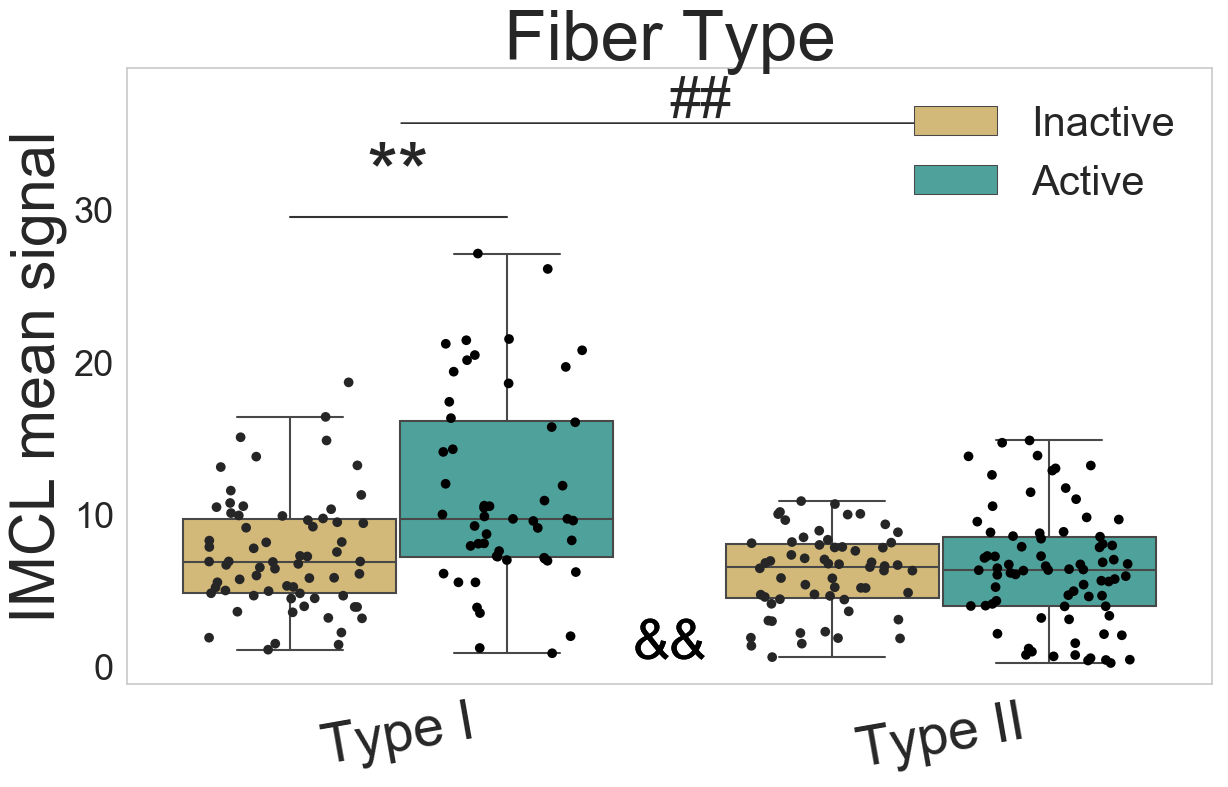

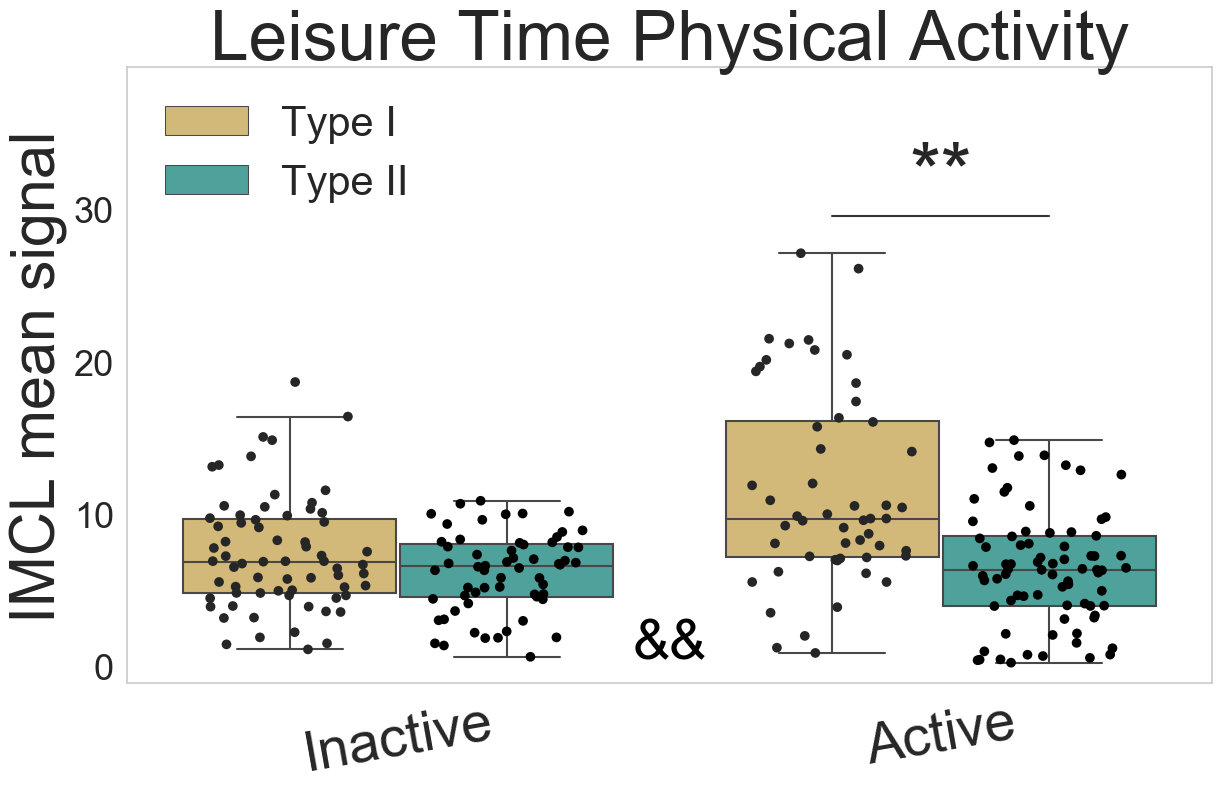

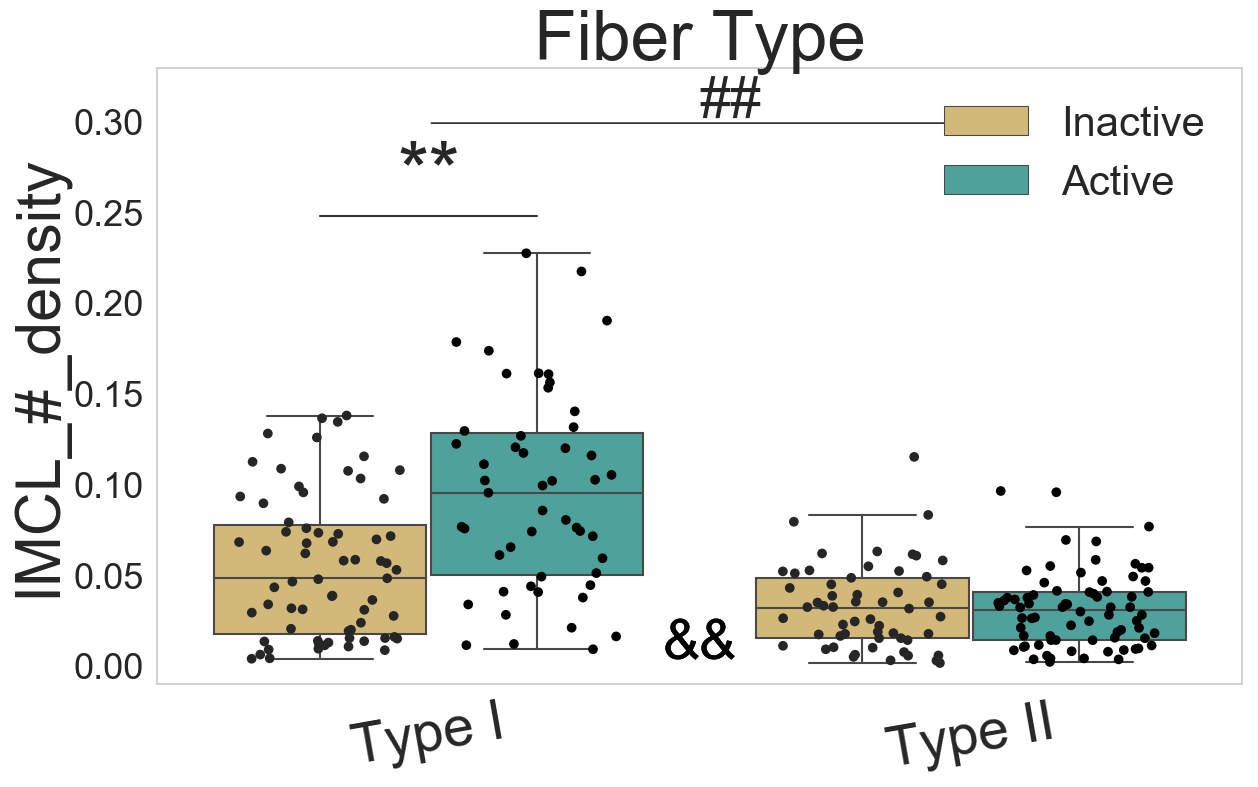

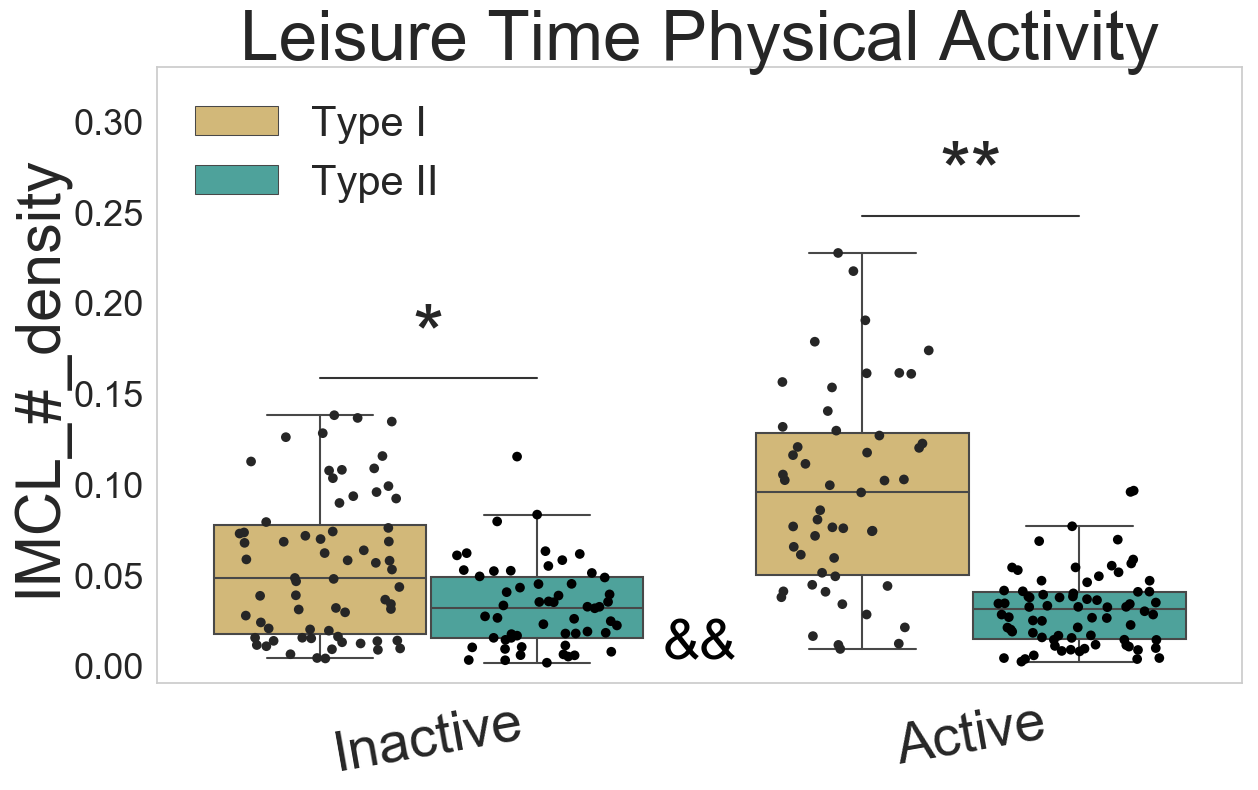

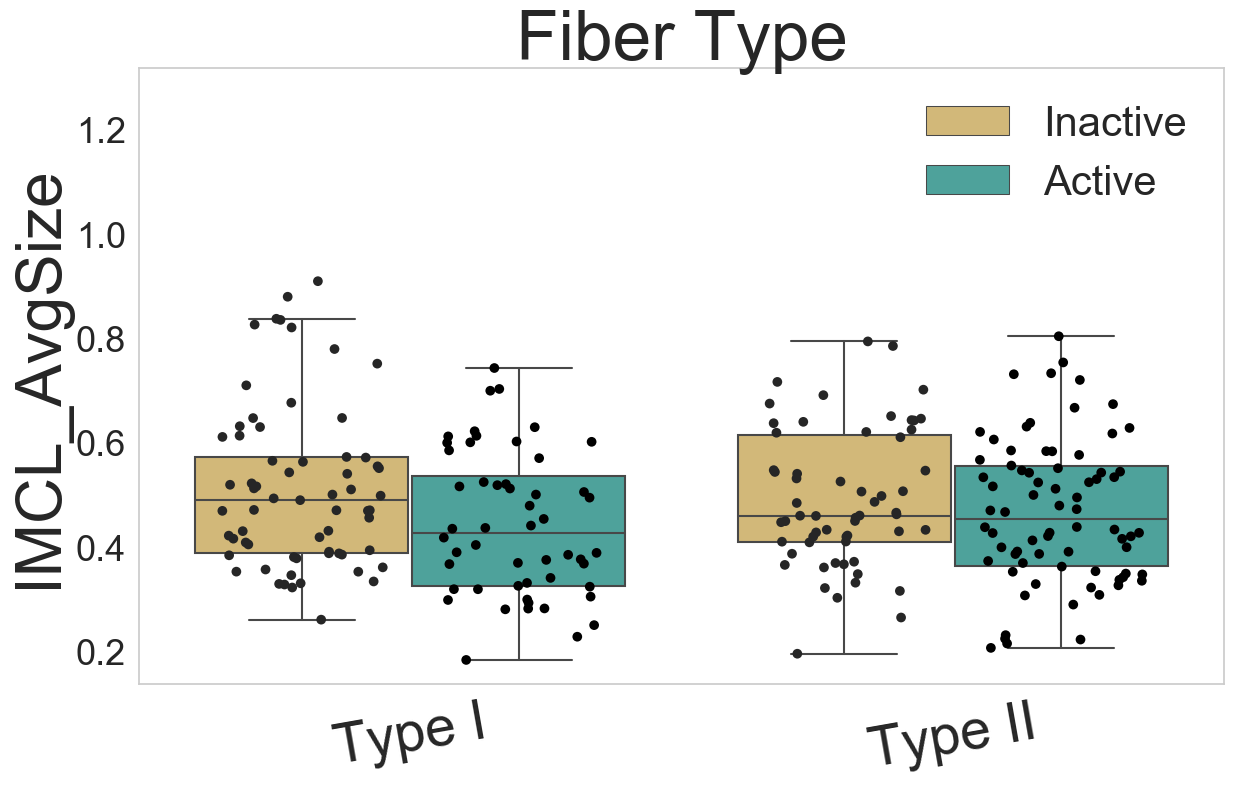

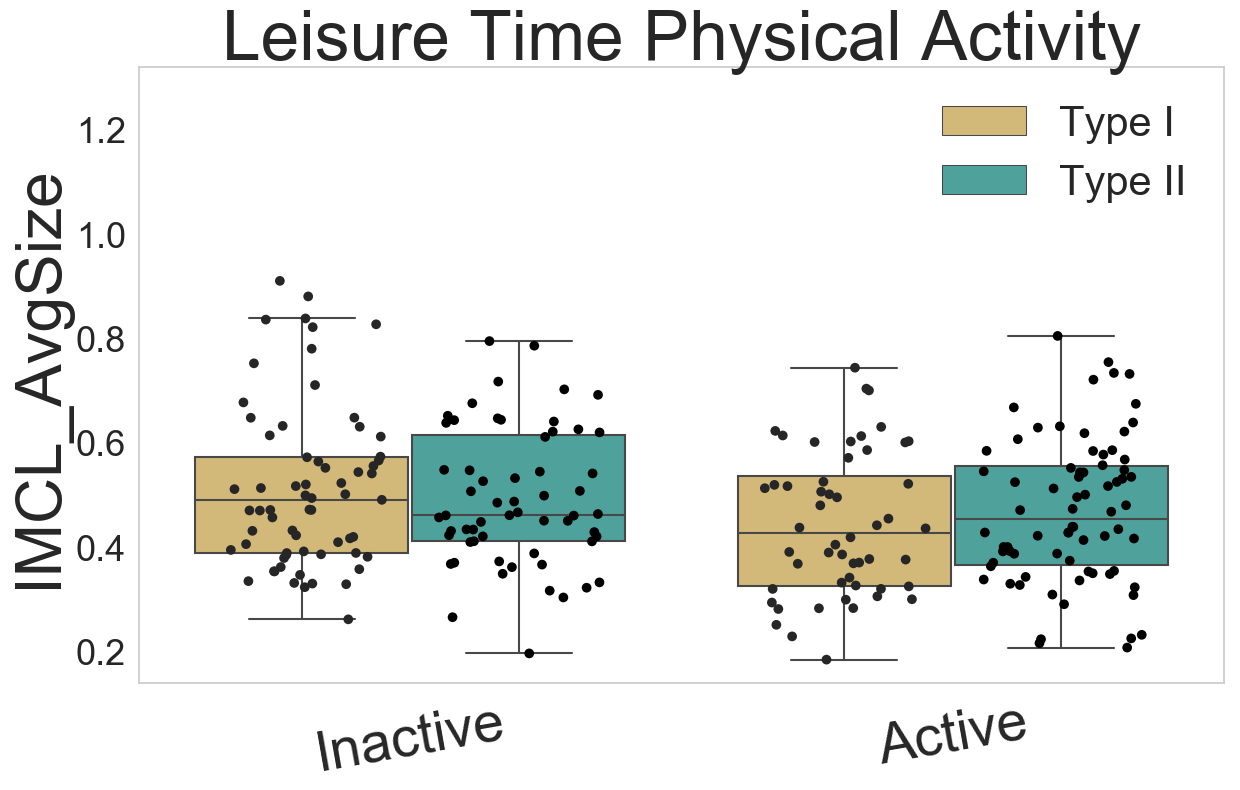

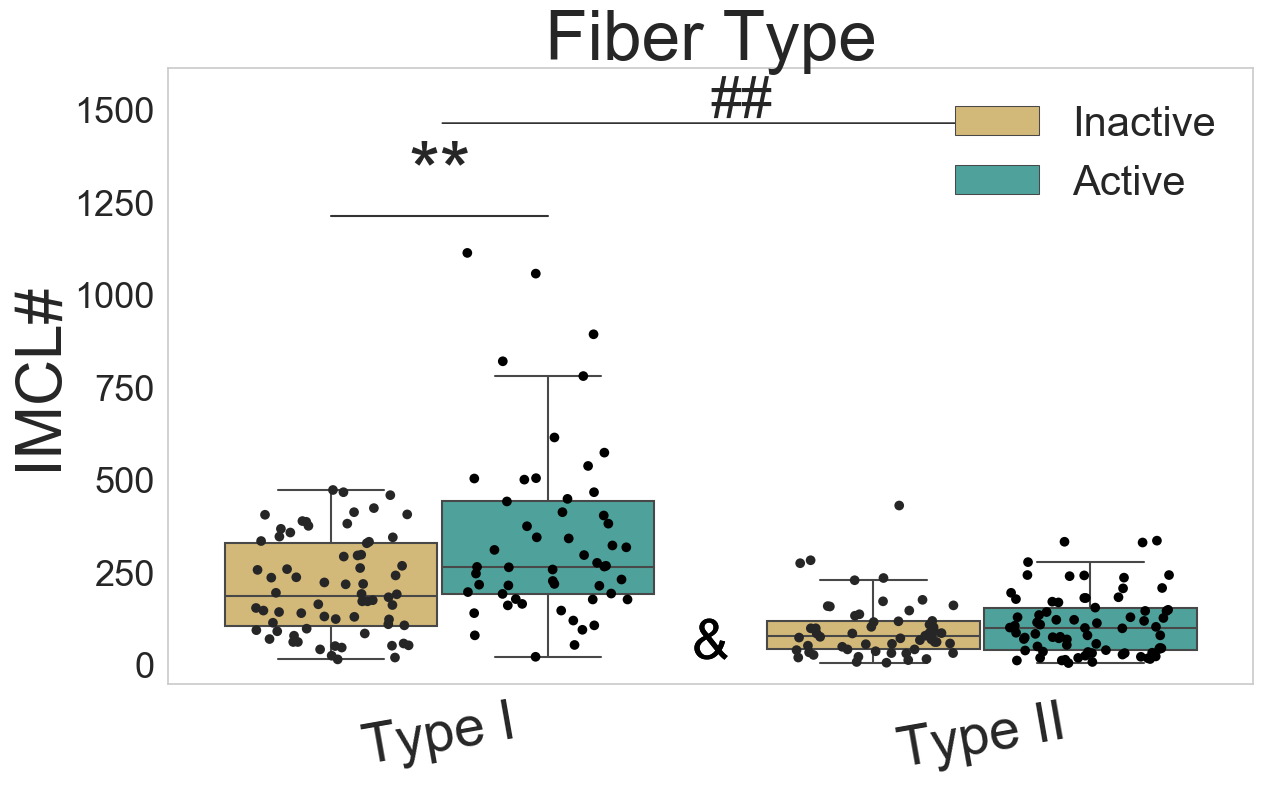

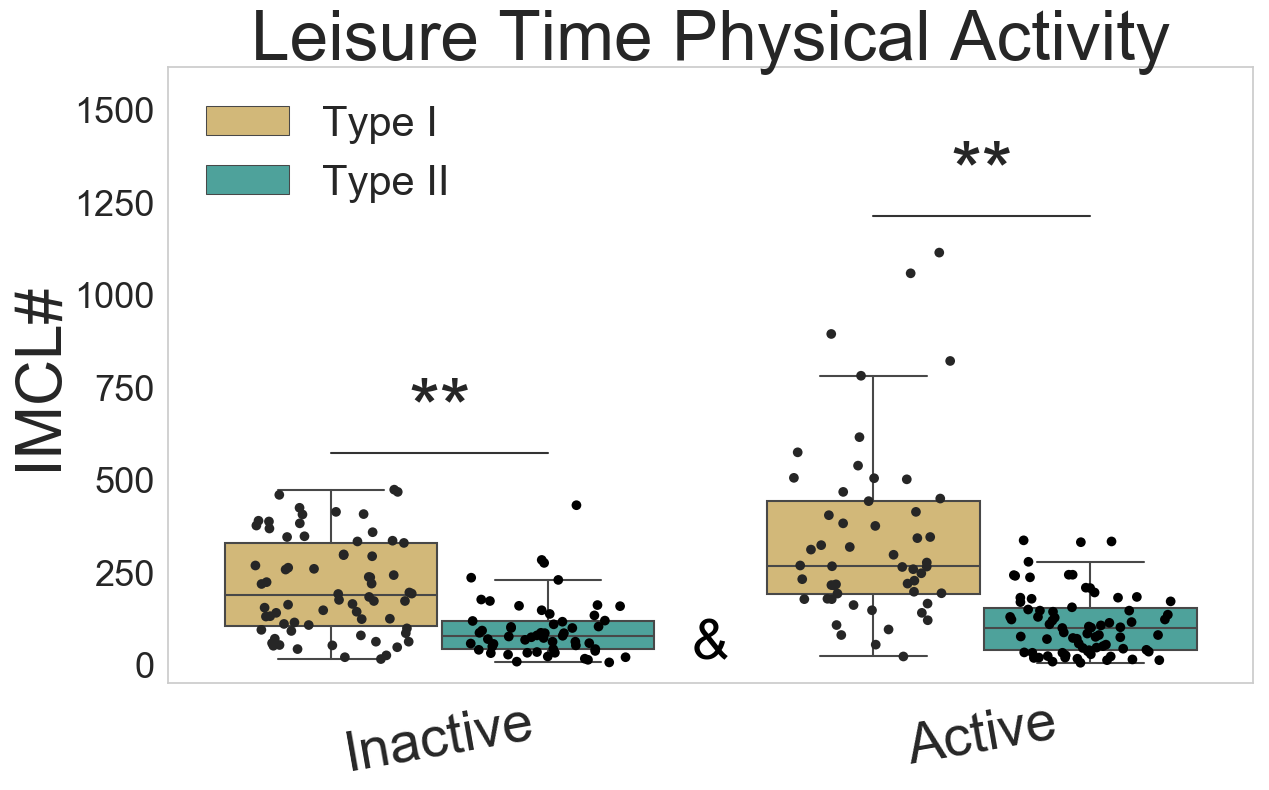

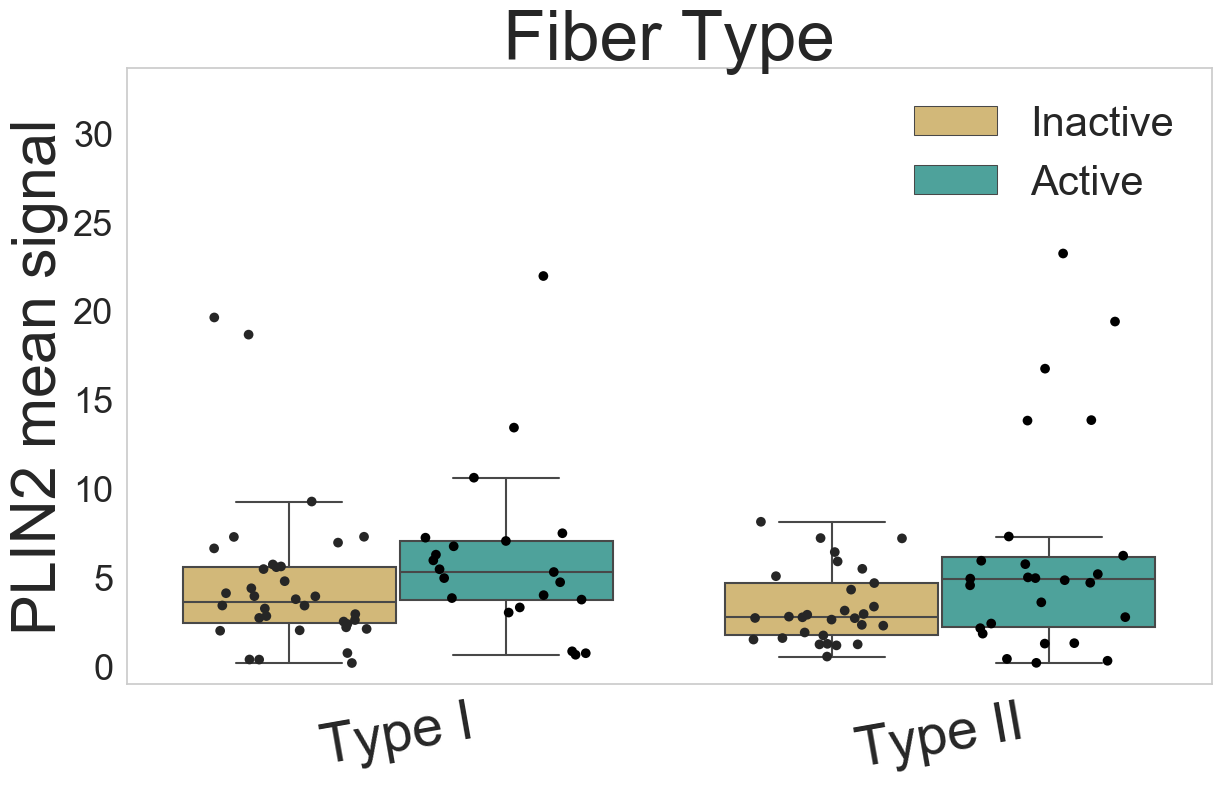

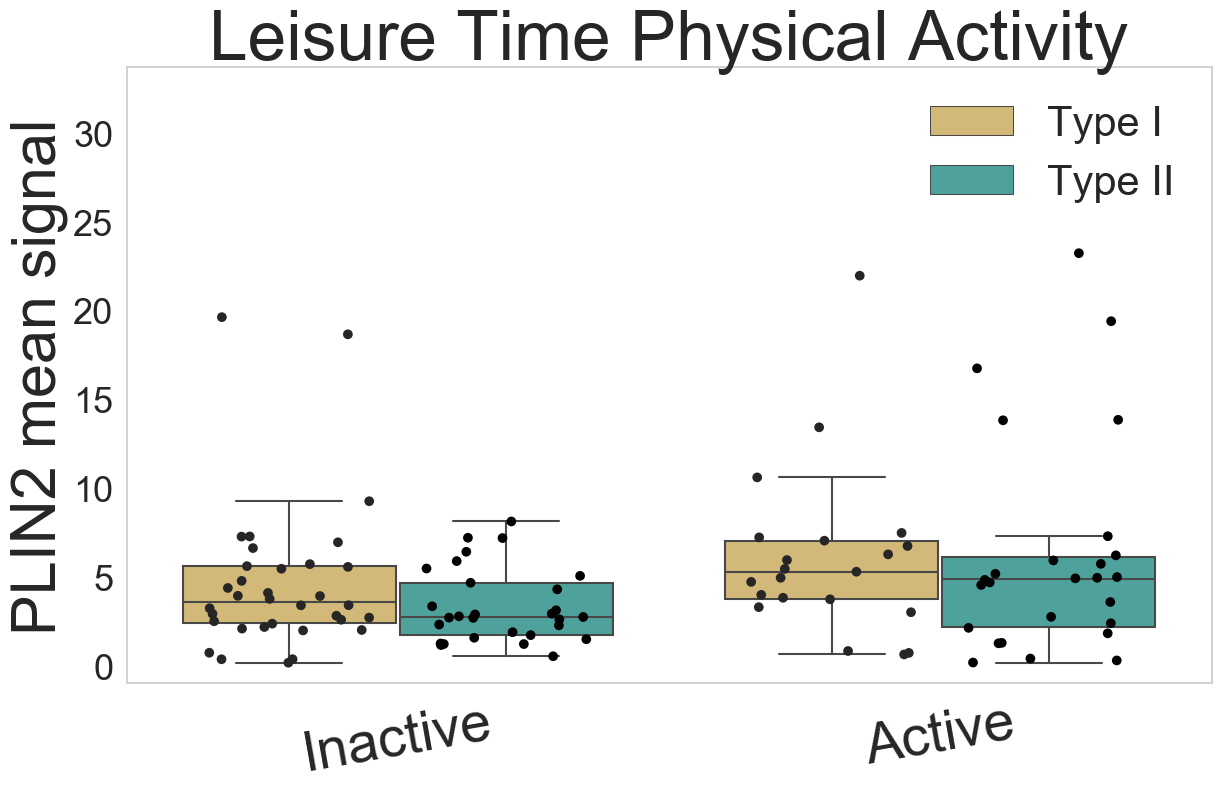

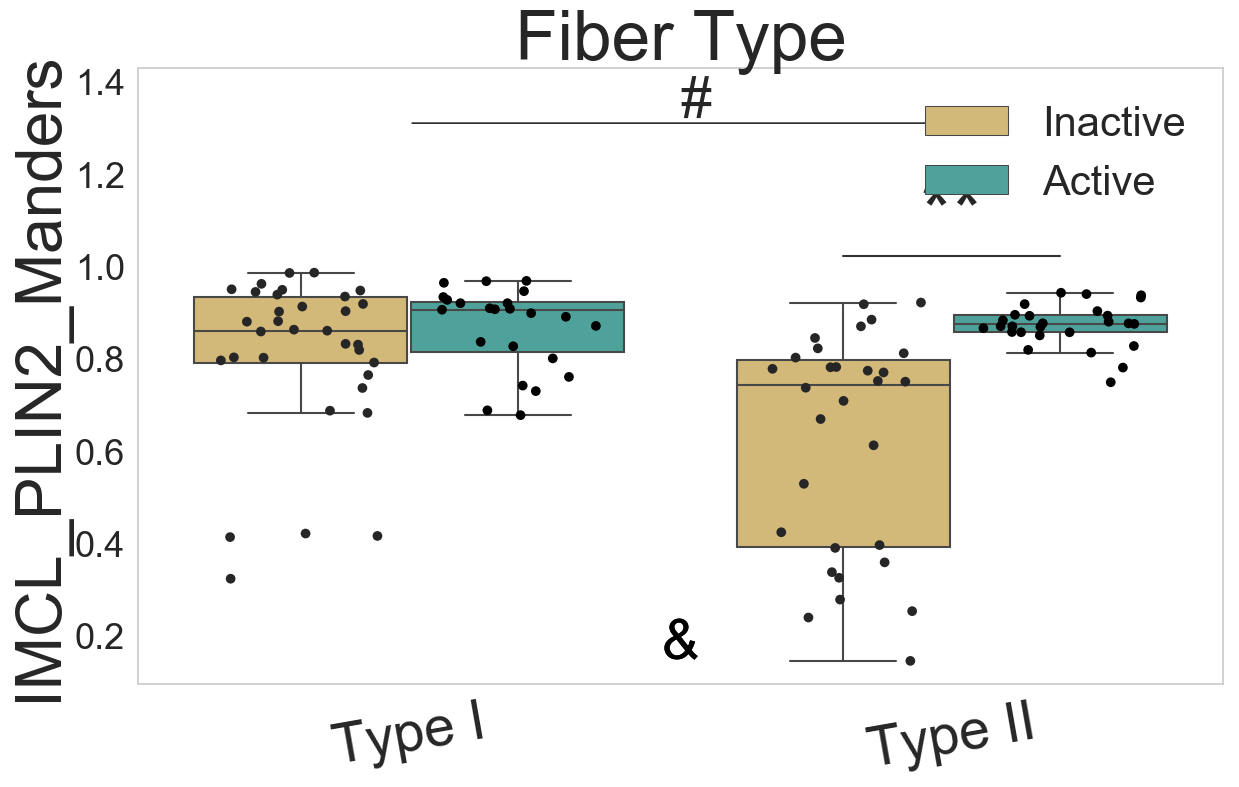

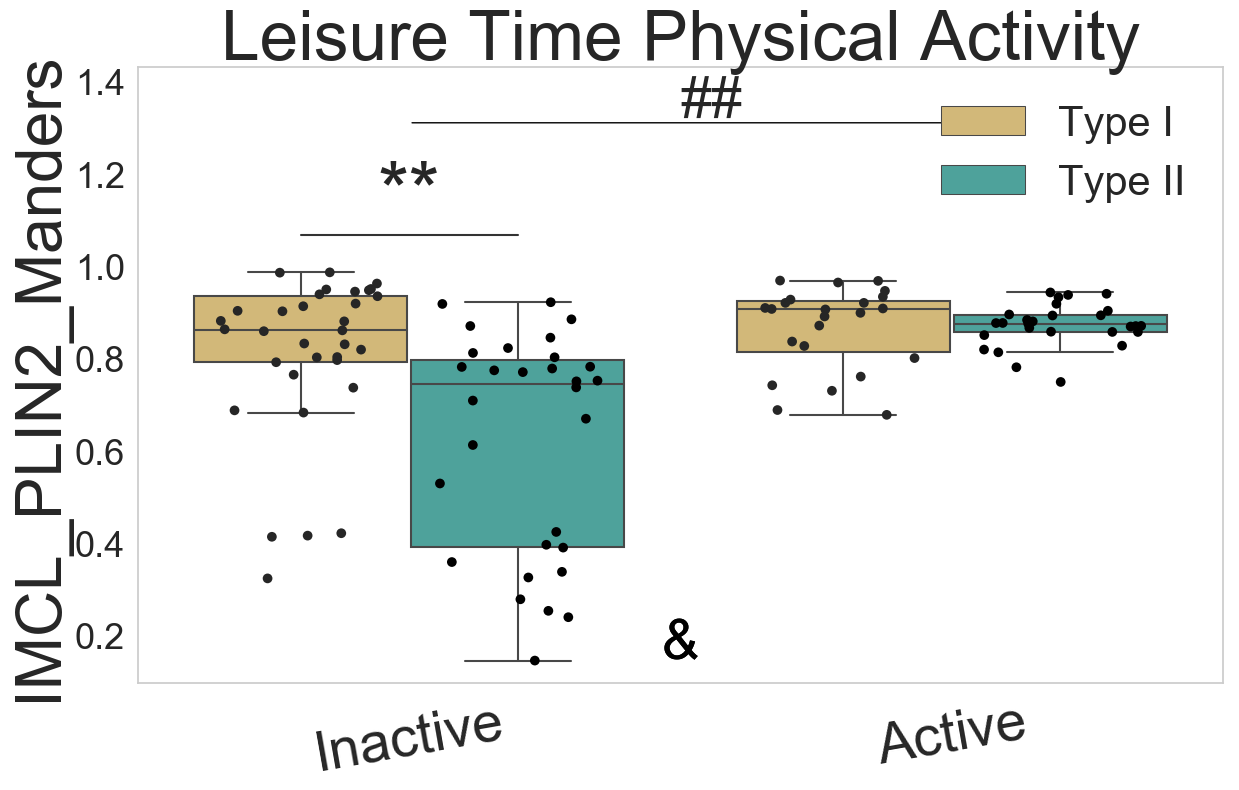

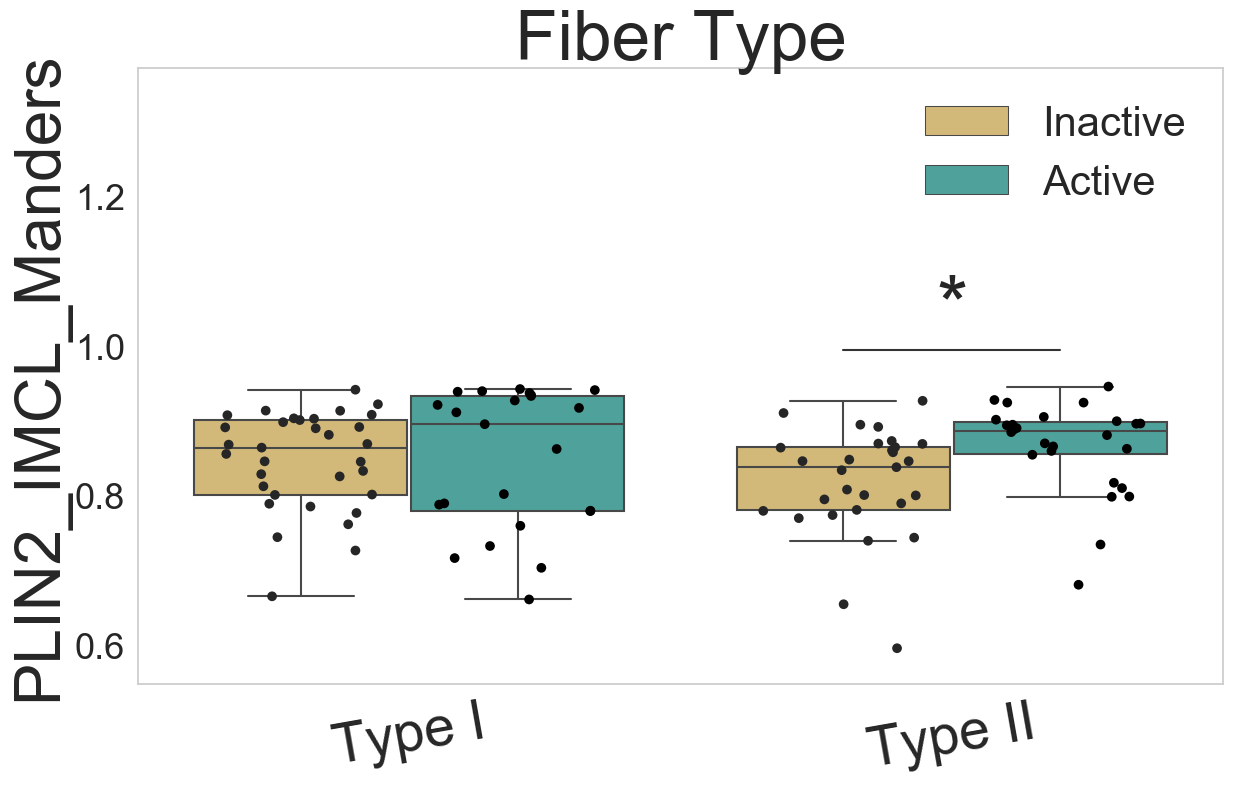

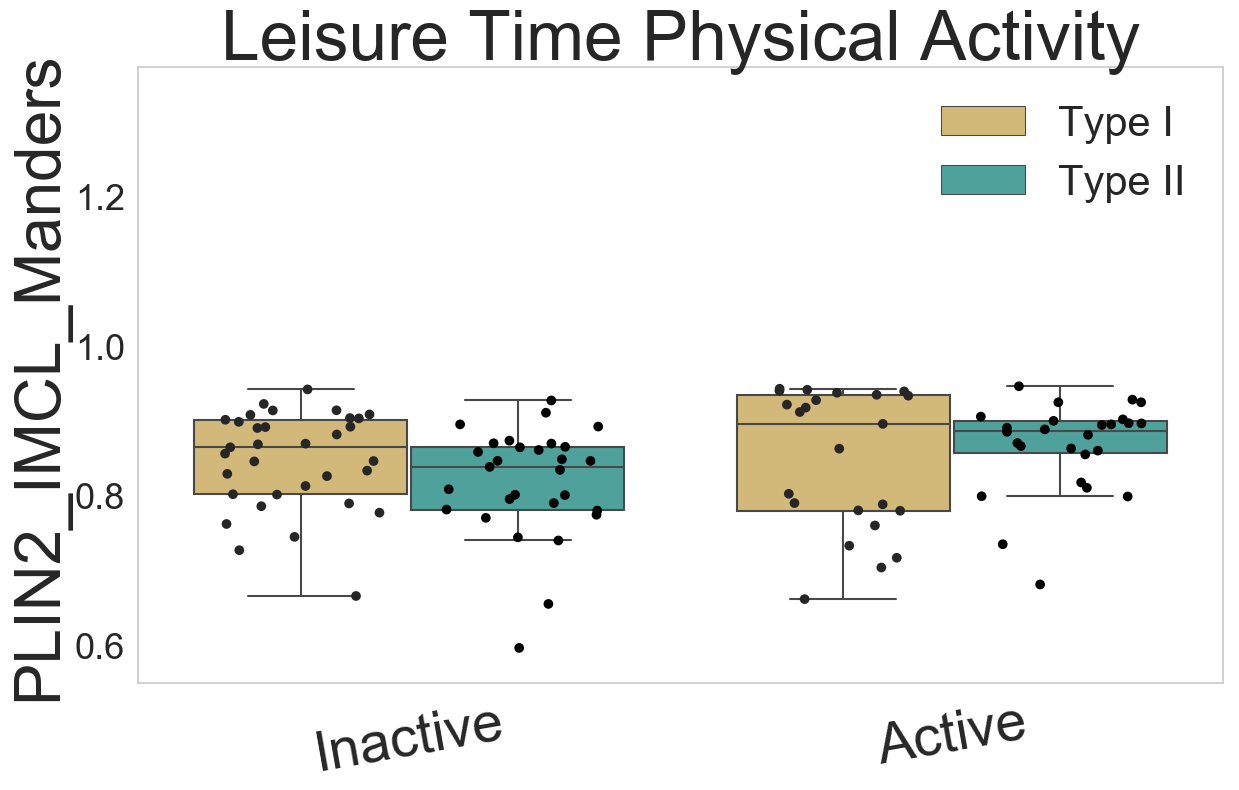

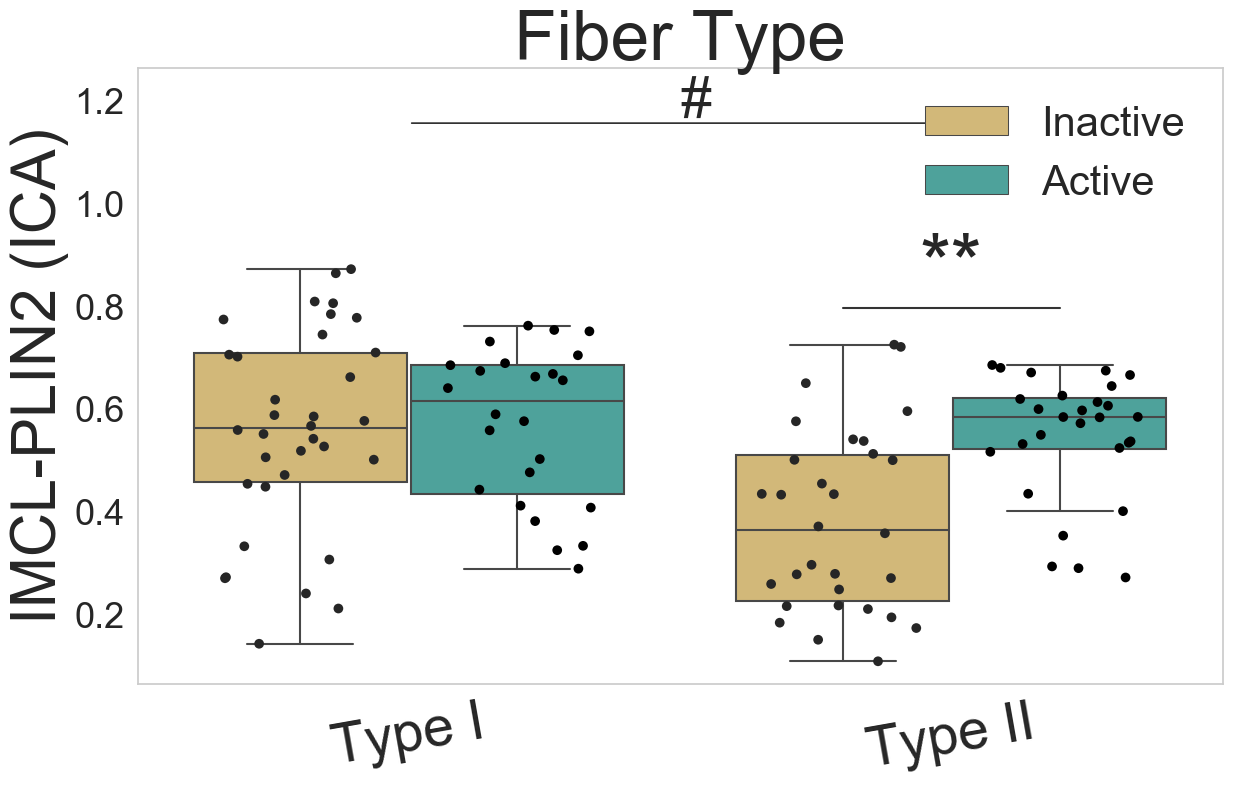

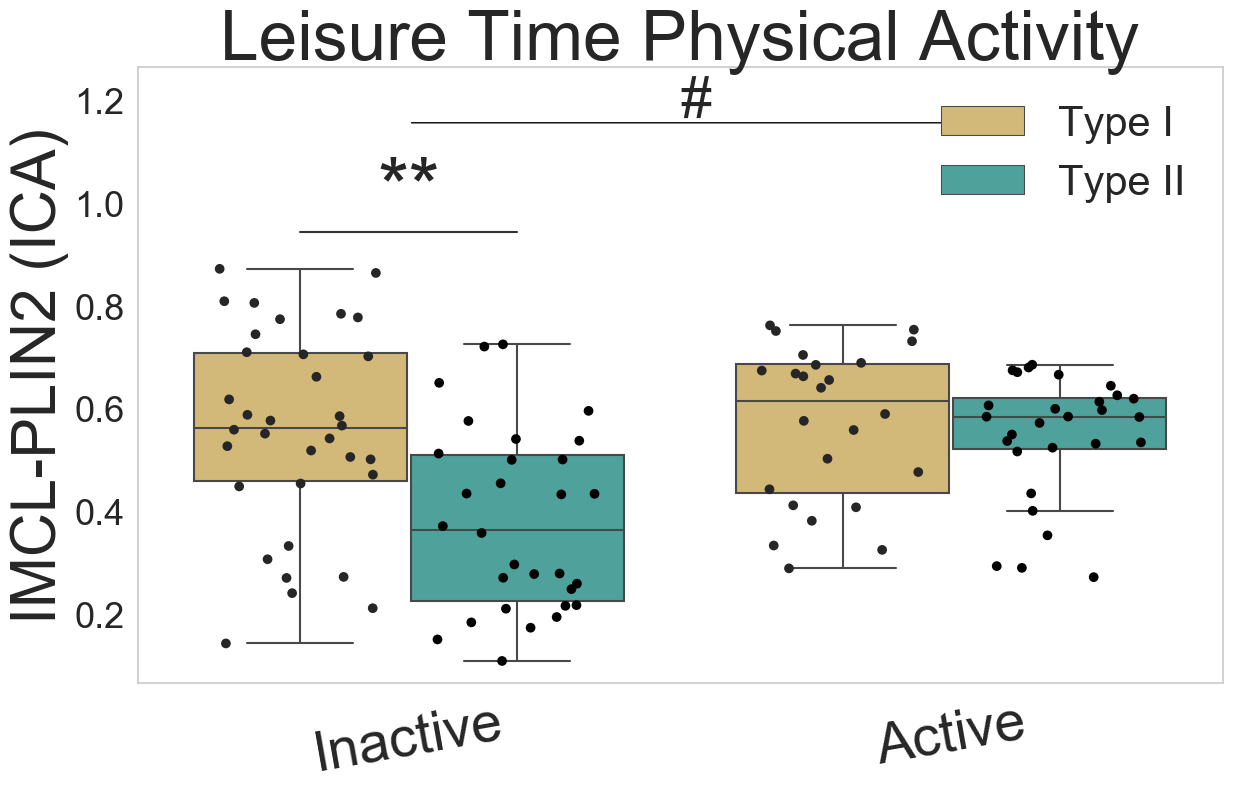

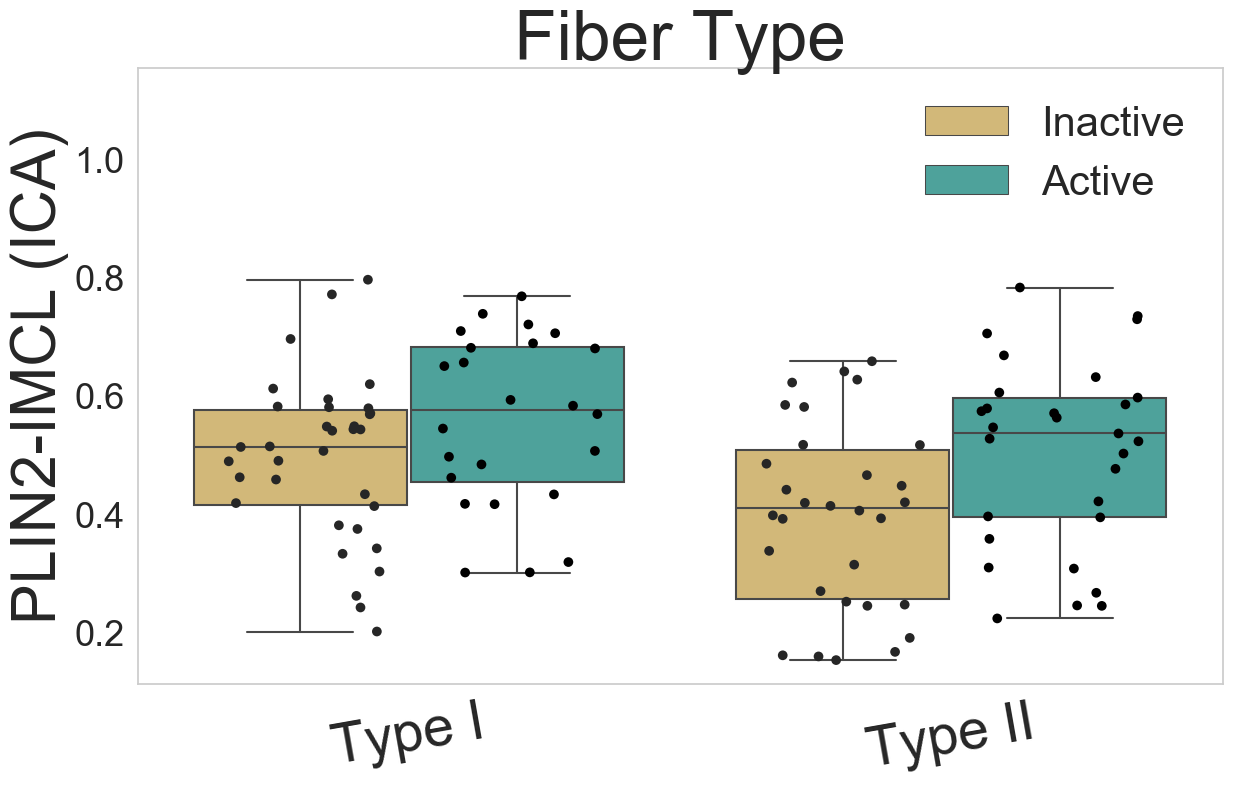

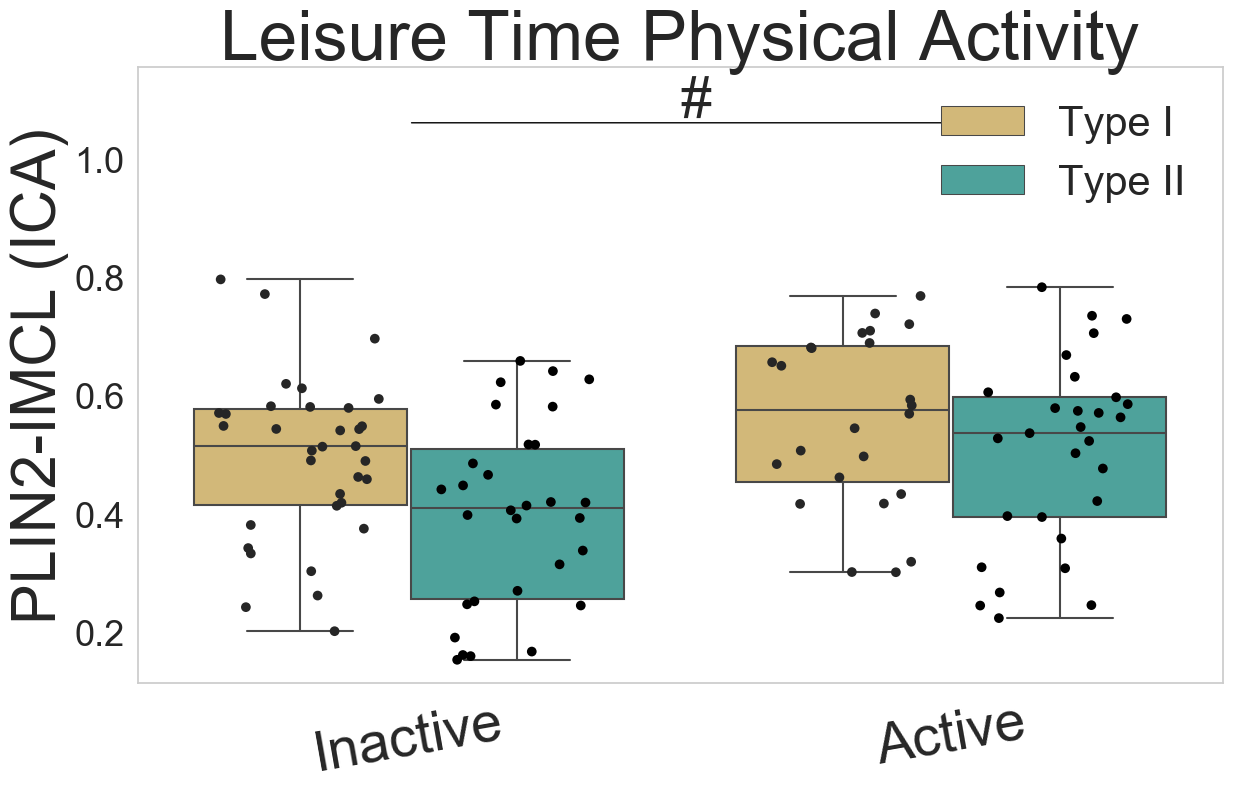

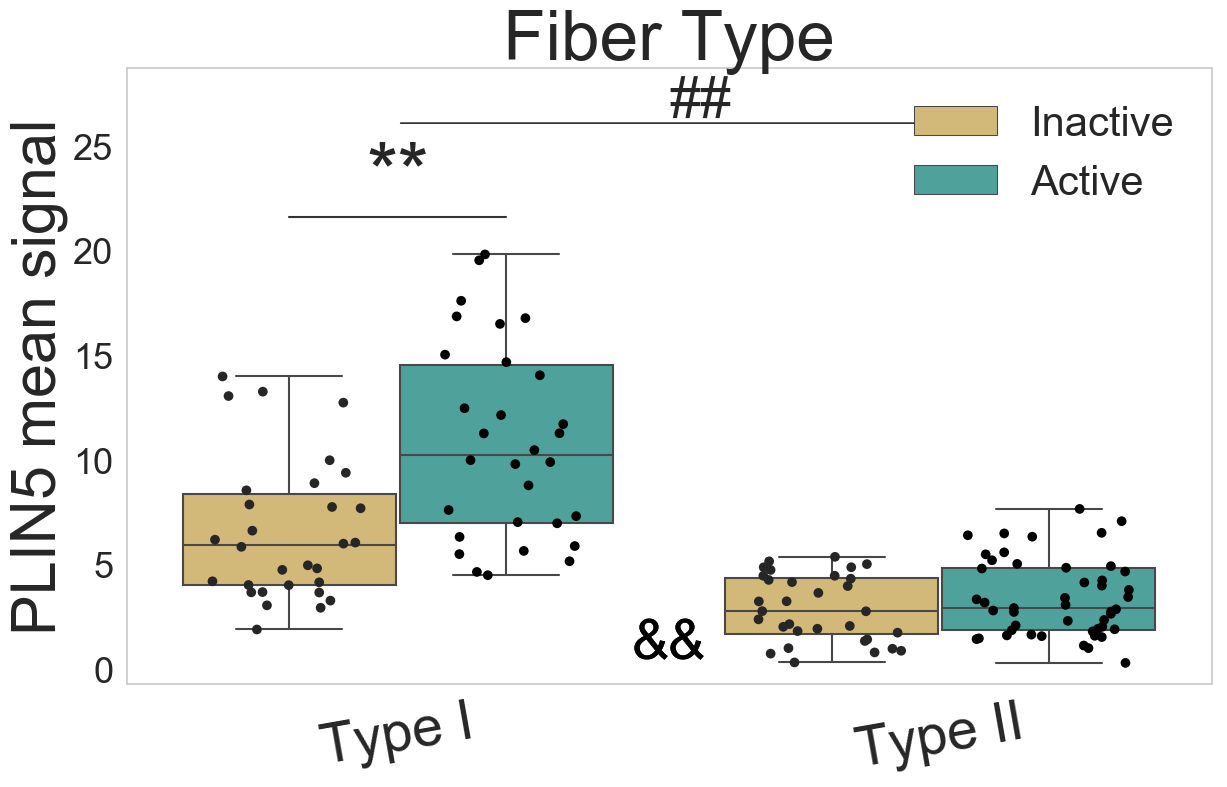

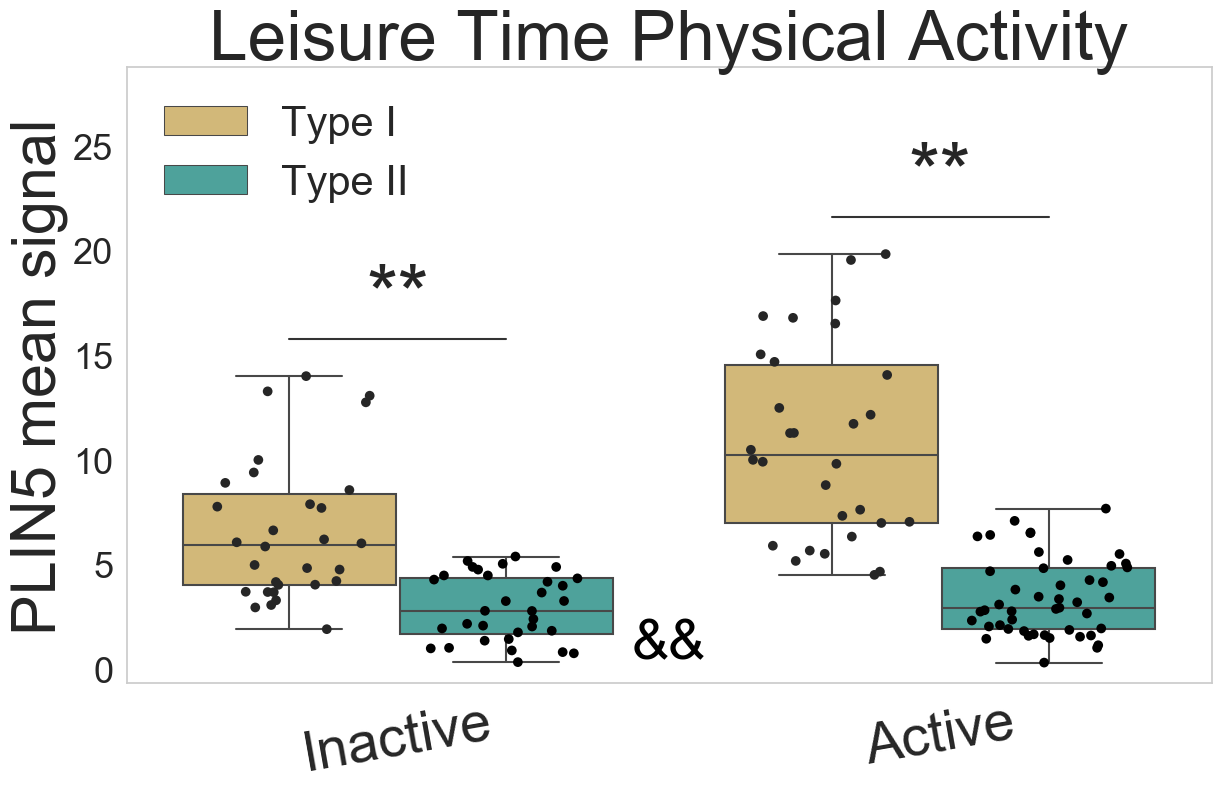

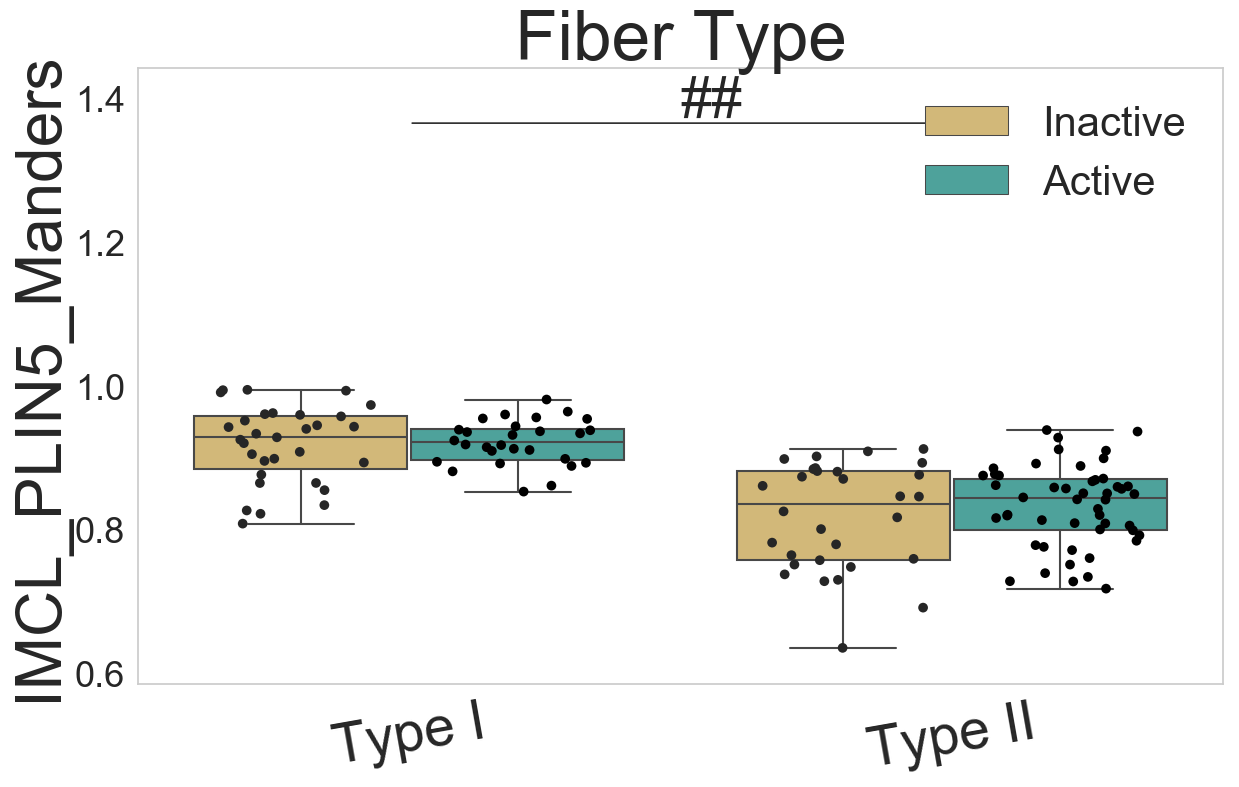

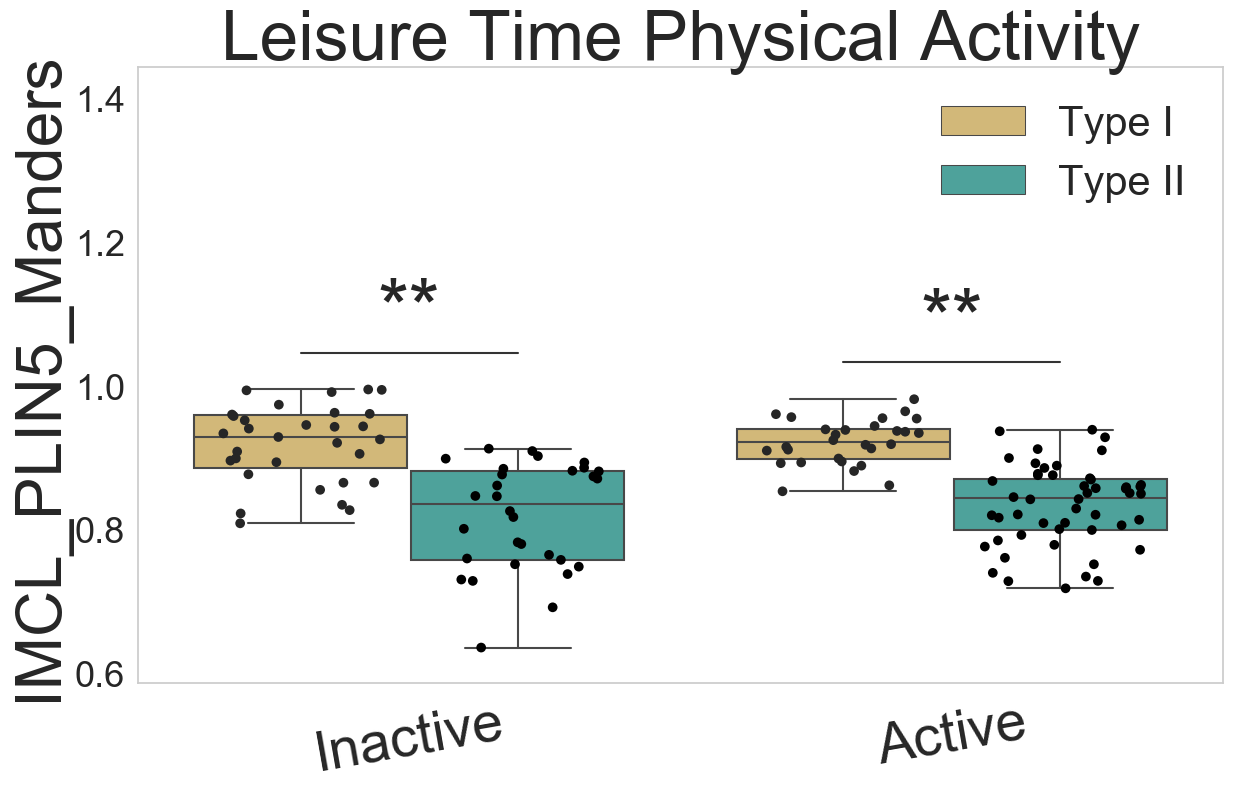

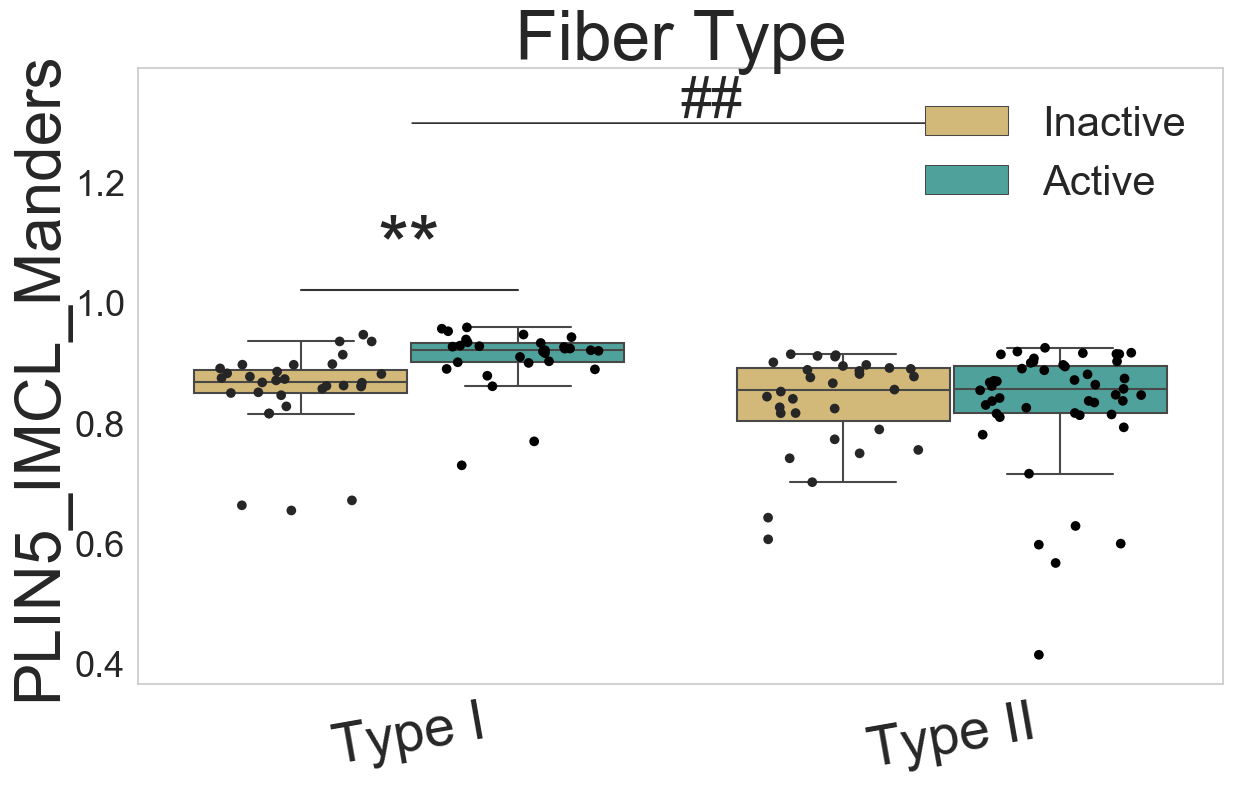

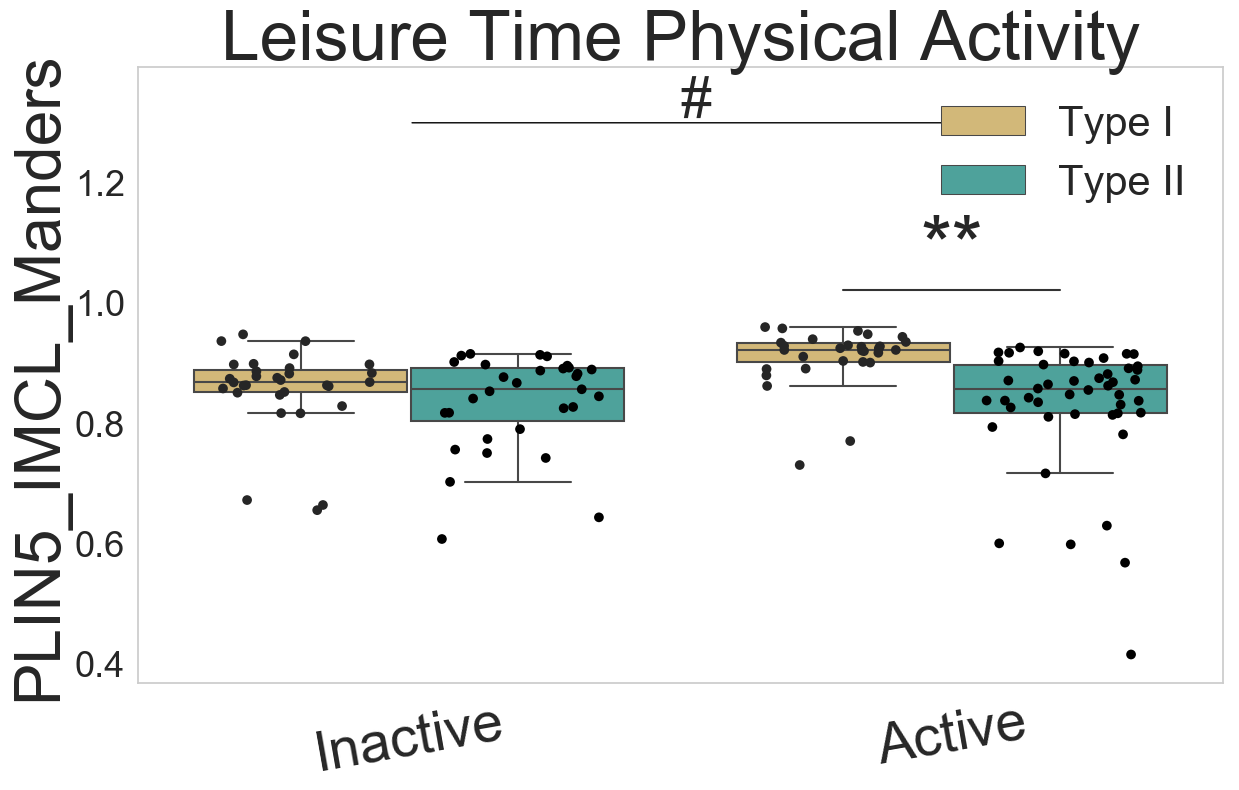

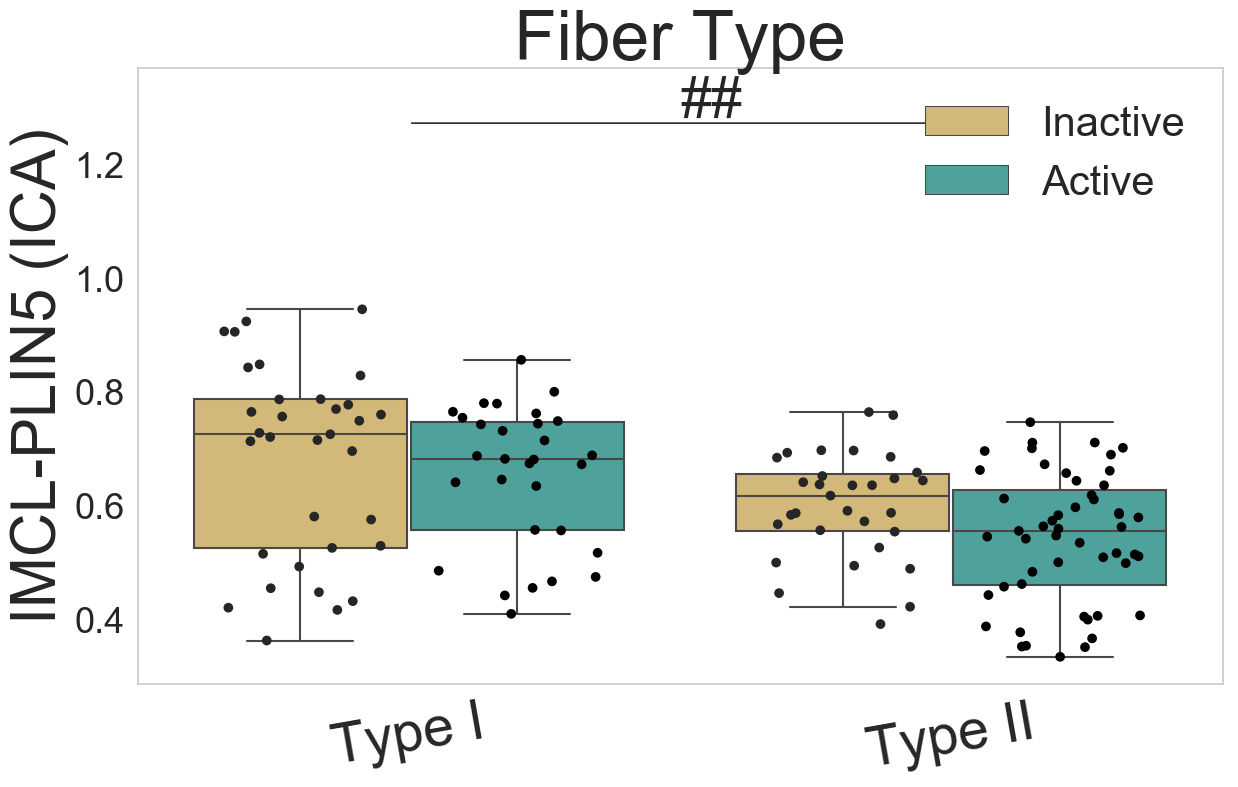

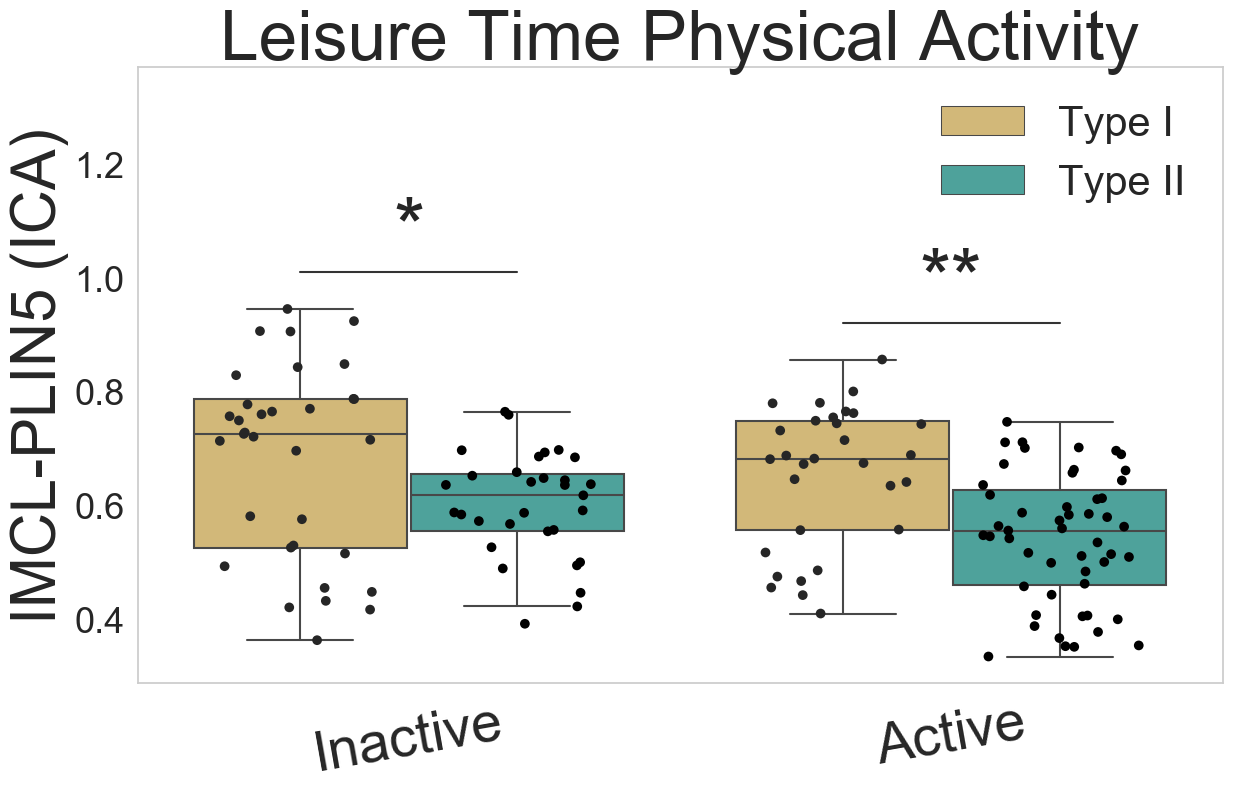

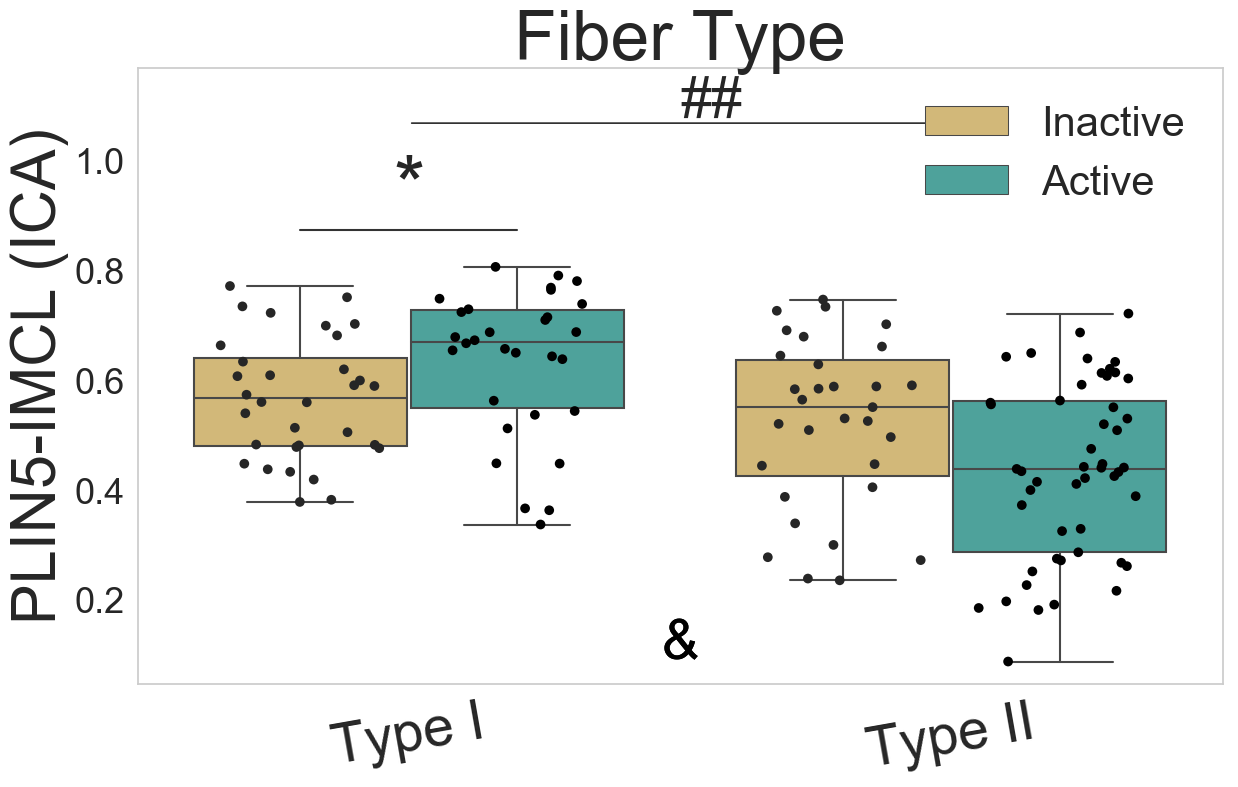

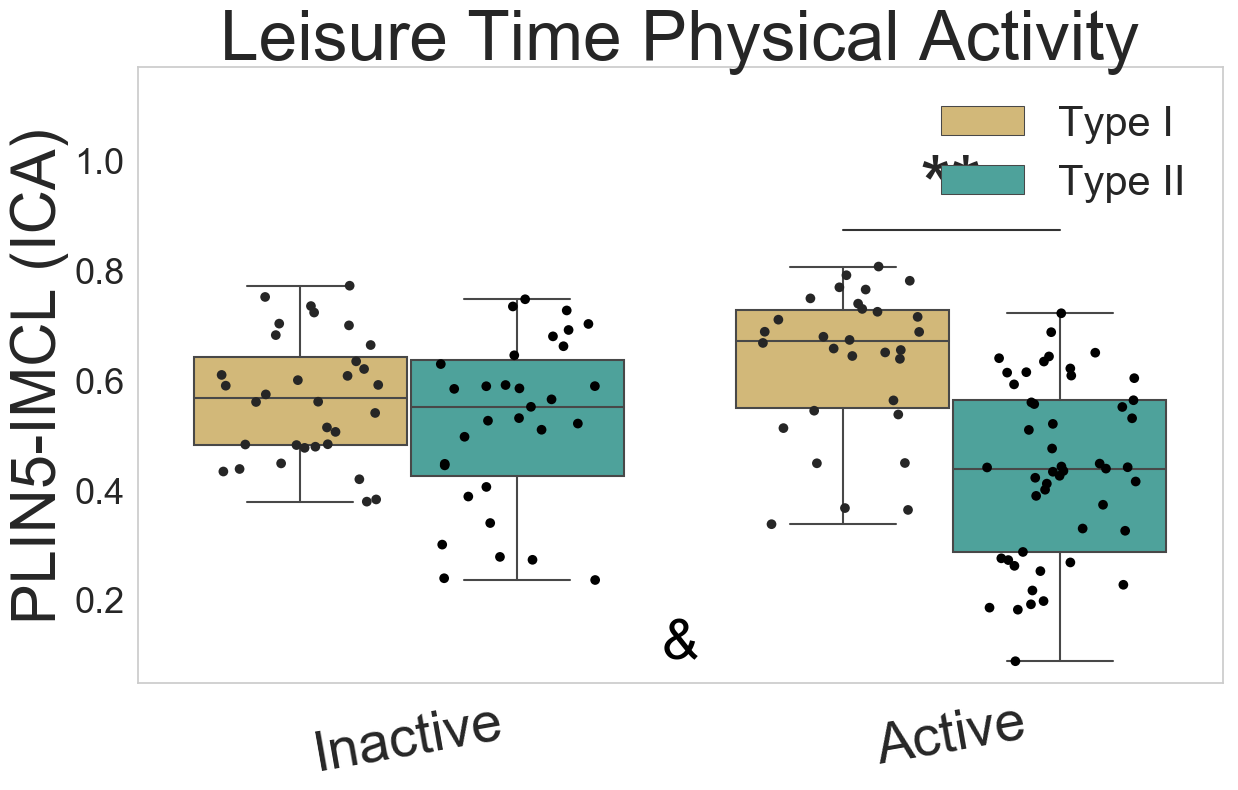

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from matplotlib.ticker import FormatStrFormatter
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.style.use('default')
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_palette('colorblind')
pal = ['#FEFE62', '#D35FB7'] #this flashy, ice creamy, maybe girly
pal = ['#E1BE6A', '#40B0A6'] #more sober, but more boring too

####################################################################################
#COMBINATIONS & INTERACTIONS
####################################################################################
dataframe = cells_df
dataframe = twinPairDT
dataframe = z_main

cases = 'cells'
typ = 'dual'

descr_vars = dataframe.columns[8:]
categ_vars = dataframe.columns[1:4]
categ_bin_vars = dataframe.columns[4:7].drop('Gender')

figSets = [categ_bin_vars]
figSetsLabels = ['categorical']

for ifs, fs in enumerate(figSets):
    categTyp = figSetsLabels[ifs]
    for y_ax in descr_vars:
        for cbv in categ_bin_vars:
            
            fig = plt.figure(figsize=(14,8))
            y_max = dataframe['{}'.format(y_ax)].max()
            y_min = dataframe['{}'.format(y_ax)].min()
            ii=0
            for i, exp in enumerate(fs):
                if cbv != exp:
                    ii += 1 
                    ax = fig.add_subplot(1, len(fs)-1, ii)

                    sns.boxplot(x=exp, y=y_ax, data=dataframe, hue=cbv, showfliers=False, palette=pal, ax=ax)
                    sns.stripplot(x=exp, y=y_ax, data=dataframe, hue=cbv, dodge=True, jitter=0.3, color='black', ax=ax, size=7)

                    handles, labels = ax.get_legend_handles_labels()
                    ax.legend(handles[0:2], [labels[0], labels[1]], fontsize=30, frameon=False, loc='best')
                    #ax.legend('', [labels[0], labels[1]], fontsize=30, frameon=False, loc='best')

                    ax.set_xlabel('')
                    if ii == 1:
                        if 'tManders' in y_ax:
                            ax.set_ylabel('{}'.format(y_ax.replace('_', '-').replace('-tManders', ' (ICA)')), fontsize=44)
                        elif 'density' in y_ax: 
                            ax.set_ylabel('{}'.format(y_ax.replace('_signal_density', ' mean signal')), fontsize=44)
                        else:
                            ax.set_ylabel(y_ax, fontsize=46)
                        
                    else:
                        ax.set_ylabel('')
                    ax.tick_params(labelsize=26)
                    ax.set_xticklabels(dataframe[exp].unique(), fontsize=40, rotation=10)

                    #wrp_grp_labels = ['\n'.join(labls.split()) for labls in grp_labels]

                    #ax.set_aspect('auto')
                    ax.set_ylim(y_min-(y_max*0.05), 1.45*y_max)
                    #plt.ticklabel_format(axis='y', style='scientific', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
                    if exp == 'FiberType':
                        plt.title('Fiber Type', fontsize=50)
                    elif exp == 'Activity':
                        plt.title('Leisure Time Physical Activity', fontsize=50)
                    else:
                        plt.title(exp, fontsize=50)
                    #ax.set_aspect('auto')

                    if categTyp == 'categorical':
                        makeStats(dataframe, y_ax, [exp, cbv], ax, typ, cases)
         
            
            directory = r'D:\VASCO\kaksoset\results_graphs\{}\{}'.format(cases, typ)
            fig.savefig('{}\{}\{}_per{}.png'.format(directory, categTyp, y_ax, cbv))
            #fig.savefig('{}\{}\{}per{}.pdf'.format(directory, categTyp, y_ax, cbv))

In [183]:
x='type II'
string.capwords(x)

NameError: name 'string' is not defined

In [18]:
from scipy import stats
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

#def makeStats(cell, cv, exprmt, ax, typ):
def makeStats(cell, cv, exprmt, ax, typ, cases):
    
    if cases is 'subjects':
        set_pv = [0.05, 0.01, 0.001]
    elif cases is 'cells':
        set_pv = [0.01, 0.001]      
    
    #test_list, label_list, norm_list, report_list = [],[],[],[]

    def orgMonoData(task):
        test_list, label_list, norm_list, report_list = [],[],[],[] #but prepare new simple main effect results
        
        exprmt2 = None
        for i in range(len(exprmt)): 
            g = cell[exprmt[0]].unique()
            tsl, lbl, ntl, stl = (),(),(),()
            for ii, ig in enumerate(g):
                data = cell[cv][(cell[exprmt[i]] == ig)].dropna()
                #print(len(data))
                if len(data) >= 3:
                    sw_test = round(stats.shapiro(data)[1], 4)
                    Exp = (data, ig, sw_test)
                    tsl = tsl + (Exp[0],)
                    lbl = lbl + (Exp[1],)
                    ntl = ntl + (Exp[2],)
                    report_list.append(('Shapiro-Wilk p-value for {} in {} : {}'.format(cv, ig, sw_test), sw_test))
                else: 
                    print('{} group seems to have insufficient number of cases ({})'.format(ig, len(data)))
                    lbl = lbl + (ig,)

            test_list.append(tsl)
            label_list.append(lbl)
            norm_list.append(ntl)
            
        return runTests(test_list, label_list, norm_list, report_list, exprmt2, task)
            

    def orgDualData(task):
        test_list, label_list, norm_list, report_list = [],[],[],[] #but prepare new simple main effect results

        exprmt2 = exprmt[1]
        g = cell[exprmt[0]].unique()
        gg = cell[exprmt[1]].unique()
        for i in g:
            tsl, lbl, ntl, stl = (),(),(),()
            for ii in gg:
                data = cell[cv][(cell[exprmt[0]] == i)&(cell[exprmt[1]] == ii)].dropna()
                if len(data) >= 3:
                    sw_test = round(stats.shapiro(data)[1], 4)
                    Exp = (data, (i, ii), sw_test)
                    tsl = tsl + (Exp[0],)
                    lbl = lbl + (Exp[1],)
                    ntl = ntl + (Exp[2],)
                    report_list.append(('Shapiro-Wilk p-value for {} in {} {} : {}'.format(cv, i, ii, sw_test), sw_test))
                else: 
                    print('{} {} group seems to have insufficient number of cases ({})'.format(i, ii, len(data)))
                    lbl = lbl + ((i,ii),)

            test_list.append(tsl)
            label_list.append(lbl)
            norm_list.append(ntl)

        return runTests(test_list, label_list, norm_list, report_list, exprmt2, task)
            
            
    def runTests(test_list, label_list, norm_list, report_list, exprmt2, task):
        distrib, choice = 'parametric', 'T-test' #default
        for pair in norm_list:
            for norm in pair:
                if norm <= 0.05: distrib, choice = 'non-parametric', 'Mann-Whitney'
        
        if task == 'postHocs':
            symb = '*'
        elif task == 'mainEffect':
            symb = r'#'
            
        signSymb = [symb, symb*2, symb*3]
        signif_pairs = []
        pv_list = []
        sign_list = []
        sign = 'none'
        for ti, test in enumerate(test_list):
            if len(test) == 2:
                
                #MANN-WHITNEY
                h, pv = stats.mannwhitneyu(test[0], test[1])
                report_list.append(('\nMW P value between {} and {}: {}'.format(label_list[ti][0], label_list[ti][1], round(pv,4)), round(pv,4))) 
                if pv <= set_pv[0] and distrib == 'non-parametric': 
                    sign = signSymb[0]
                    if pv <= set_pv[1]: sign = signSymb[1]
                    #if pv <= set_pv[2]: sign = signSymb[2]
                    sign_list.append(sign) 
                    pv_list.append(round(pv,4))
                    signif_pairs.append(label_list[ti])

                #T-TEST
                h, pv = stats.ttest_ind(test[0], test[1])
                report_list.append(('t-test P value between {} and {}: {}'.format(label_list[ti][0], label_list[ti][1], round(pv,4)), round(pv,4)))
                if pv <= set_pv[0] and distrib == 'parametric': 
                    sign = signSymb[0]
                    if pv <= set_pv[1]: sign = signSymb[1]
                    #if pv <= set_pv[2]: sign = signSymb[2]
                    sign_list.append(sign)
                    pv_list.append(round(pv,4))
                    signif_pairs.append(label_list[ti])             
                
            else: print('{} and {} could not be compared as there is no valid. One of these is missing'.format(label_list[ti][0], label_list[ti][1]))
        
        #2-Way ANOVA
        #just changing the name of the columns (and copying the dataframe) in order for the next statistcal methods to work
        new_cols = []
        for v in cell.columns:
            new_cols.append(v.replace('(AU)','').replace(' ','').replace('#','').replace('.','').replace('(μm)',''))

        data = cell.copy()
        data.columns = new_cols
        cv_ = cv.replace('(AU)','').replace(' ','').replace('#','').replace('.','').replace('(μm)','')
        
        mod_all = ols('{}~{}+{}+{}*{}'.format(cv_, exprmt[0], exprmt[1], exprmt[0], exprmt[1]), data = data).fit()
        aov_all = sm.stats.anova_lm(mod_all, type=1)
        inter_effect = aov_all['PR(>F)'][2]
        
        print('\n 2-WAY ANOVA on {}:\n'.format(cv), aov_all)
        IFsign = 'none'
        if inter_effect <= set_pv[0]: IFsign = '&'
        if inter_effect <= set_pv[1]: IFsign = '&&'
        #if inter_effect <= set_pv[2]: IFsign = '&&&'
        
        
        return writeStats(signif_pairs, pv_list, sign_list, distrib, choice, exprmt2, task, signSymb, report_list, IFsign)

    
    
    def writeStats(signif_pairs, pv_list, sign_list, distrib, choice, exprmt2, task, signSymb, report_list, IFsign):
        if len(signif_pairs) > 0:
            #print(signif_pairs)
            if task == 'postHocs':
                add_stat_annotation(ax, data=cell, x=exprmt[0], y=cv, hue=exprmt2,
                            box_pairs=signif_pairs, pvalues=pv_list,
                            perform_stat_test=False, line_height=0.0,
                            test=None, text_annot_custom=sign_list,
                            loc='inside', verbose=2, fontsize=58)
            elif task == 'mainEffect':
                ax.annotate('', xy=(0.25, 0.91), xycoords='axes fraction', xytext=(0.75, 0.91),
                            arrowprops=dict(arrowstyle="-", color='black'), fontsize=24)
                ax.annotate('{}'.format(sign_list[0]), xy=(0.25, 0.92), xycoords='axes fraction', 
                            xytext=(0.5, 0.92), fontsize=40)
            if IFsign != 'none':
                ax.annotate('{}'.format(IFsign), xy=(0.5, 0.04), xycoords='axes fraction', 
                            xytext=(0.5, 0.04), fontsize=40, color='black', horizontalalignment='center')
            
        #write down stats
        for sr in report_list:
            sg=''
            if sr[1] <= set_pv[0]: sg = signSymb[0]
            if sr[1] <= set_pv[1]: sg = signSymb[1]
            #if sr[1] <= set_pv[2]: sg = signSymb[2]
            print('{}{}'.format(sr[0], sg))  

        print('\n{} tests are more advised. {} will be used\n'.format(distrib, choice))


        print('signifficant pairs:', signif_pairs)
        print('p-value if signifficant:',pv_list, '\n')
        
        return 'stats done here!'
     
        
        
        #ax.text(0.5, 0.1, r'main effect{}: $\rho$= {}; $\it{{P}}$= {}{}'.format(grp_lbls[g], 
        #                    round(rho, 3), round(pv, 3), sign), horizontalalignment='center', 
        #                    verticalalignment='center', transform=ax.transAxes, fontsize=16, weight=cor)
    
    
    if typ == 'dual':
        orgMonoData('mainEffect')
        orgDualData('postHocs')
    else:
        orgMonoData('postHocs')

In [10]:
import pandas as pd
datafile = r'D:\VASCO\kaksoset\subjects_data_twins.csv'

#newdf=pd.DataFrame(columns = ['Subject', 'Family', 'Zygotic', 'Active', 'HealthScore', 'Gender', 'Age', 'maxVO2peak', 'BMI', 'Fat%', 'HOMAindex', 'muscleVALINE_LEUSINE_ISOLEUSINE_DEGRADATION_CENTROID', 'muscleGLYCOLYSIS_CENTROID', 'muscleUREA_CYCLE_AND_METABOLISM_OF_AMINO_GROUPS_CENTROID'])
#datafile = "{}\{}".format(directory, filename)

subject_basics = pd.read_csv (datafile ,index_col=False)
#cur_df['Subject'] = subject
#cur_df['Family'] = family
#cur_df['Gender'] = gender
#cur_df['Zygotic'] = zygot
#cur_df['Activity'] = active
#cur_df['HealthScore'] = float(health)

#newdf = pd.concat([newdf, cur_df], axis=0) 


#else:
#print('there is an error. Your subject folder does not match the subject in profile.txt')

                
                
# shift some columns position for later ease in coding
#x = newdf.pop('Cell_ID')
#y = newdf.pop('PLIN_stained')
#z = newdf.pop('HealthScore')
subject_basics

#analyzed cells     ID  Family  Zygotic  Discordant  health score  gender  \
0               12  65738   57855        2           0           1.7    male   
1               16  65739   57855        2           1          11.7    male   
2               24  75001   62478        1           1          16.3  female   
3                6  75002   62478        1           0           6.7  female   
4               26  76816   63384        2           0           0.3  female   
5               23  76817   63384        2           1          14.0  female   
6               18  82601   66268        1           0           2.7    male   
7               14  82602   66268        1           1          13.1    male   

   age  maxVO2peak  weight   BMI  fatpercentInbody  Strigly  HOMAindex  \
0   50        30.2    81.3  26.6              20.3     0.69       2.27   
1   50        29.5    73.3  23.8              10.8     0.52       1.23   
2   61        33.7    61.8  22.4              25.5     1.12       0.86   
3   61        28.9    66.3  25.0              31.0     1.15       2.34   
4   58        27.5    67.1  24.6              26.6     0.54       1.86   
5   58        37.6    61.3  24.5              23.3     0.58       0.96   
6   63        34.1    71.2  23.8              18.4     1.39       1.11   
7   63        30.3    82.6  27.6              21.4     1.60       3.11   

   muscleOXIDATIVE_PHOSPHORYLATION_CENTROID  \
0                                      0.23   
1                                     -0.21   
2                                      0.26   
3                                     -0.32   
4                                     -0.32   
5                                      0.85   
6                                      0.13   
7                                      0.92   

   muscleVALINE_LEUSINE_ISOLEUSINE_DEGRADATION_CENTROID  \
0                                              -0.26      
1                                              -0.17      
2                                               0.86      
3                                               0.24      
4                                              -0.40      
5                                               0.67      
6                                              -0.01      
7                                               0.65      

   muscleGLYCOLYSIS_CENTROID  \
0                      -0.45   
1                      -0.16   
2                       0.72   
3                       0.16   
4                      -0.35   
5                       0.32   
6                      -0.13   
7                      -0.10   

   muscleUREA_CYCLE_AND_METABOLISM_OF_AMINO_GROUPS_CENTROID  
0                                              -0.15         
1                                              -0.09         
2                                               1.14         
3                                               0.34         
4                                              -0.29         
5                                              -0.05         
6                                              -0.36         
7                                              -0.05

In [13]:
#Here we are going to try to reproduce a table for latex, with the resume of the subjects and setup, to use in the methods section
#print(ready['Age'][(ready['group']=='Controls')&(ready['cell type']=='I')])
from scipy.stats import sem

#ready['FAT%'] =  ready['FAT%'].apply(lambda x: x*100) #multiply fat% values per 100 so it actually percentual

methods_headers = ['n', 'Health score', 'Age (years)', r'VO$_{2}$max', 'Body weight (Kg)', 'BMI (Kg/m^2)', 'Body fat (%)', 'Triglycerides', 'HOMA index', 'Muscle oxidative phosphorylation', 'Muscle BCAA degradation', 'Muscle glycolysis', 'Muscle urea cycle']
groups = [ 'Inactive', 'Active']
methods_table = pd.DataFrame([], index=methods_headers, columns=groups)


i_vars = ['health score', 'age', 'maxVO2peak', 'weight', 'BMI','fatpercentInbody', 'Strigly', 'HOMAindex', 'muscleOXIDATIVE_PHOSPHORYLATION_CENTROID', 'muscleVALINE_LEUSINE_ISOLEUSINE_DEGRADATION_CENTROID', 'muscleGLYCOLYSIS_CENTROID', 'muscleUREA_CYCLE_AND_METABOLISM_OF_AMINO_GROUPS_CENTROID']

for ig, g in enumerate(groups):
    for i, v in enumerate(i_vars):
        cur_var = subject_basics[v][subject_basics['Discordant']== ig]
        methods_table[g].loc['n'] = len(subject_basics[subject_basics['Discordant']== ig])
        #print(v, cur_var.mean())  
        #cur_var.std()
        methods_table[g].iloc[i+1] = '{} +/- {}'.format (round(cur_var.mean(), 1), round(sem(cur_var), 1))
        #methods_table[g].iloc[i+1].round(3)
#print(ready)
#ready
#methods_table
print(methods_table.to_latex(index=True))
methods_table

\begin{tabular}{lll}
\toprule
{} &      Inactive &        Active \\
\midrule
n                                &             4 &             4 \\
Health score                     &   2.9 +/- 1.4 &  13.8 +/- 1.0 \\
Age (years)                      &  58.0 +/- 2.9 &  58.0 +/- 2.9 \\
VO\$\_\{2\}\$max                      &  30.2 +/- 1.4 &  32.8 +/- 1.8 \\
Body weight (Kg)                 &  71.5 +/- 3.4 &  69.8 +/- 5.1 \\
BMI (Kg/m\textasciicircum 2)                     &  25.0 +/- 0.6 &  24.6 +/- 1.1 \\
Body fat (\%)                     &  24.1 +/- 2.9 &  20.2 +/- 3.3 \\
Triglycerides                    &   0.9 +/- 0.2 &   1.0 +/- 0.3 \\
HOMA index                       &   1.9 +/- 0.3 &   1.5 +/- 0.5 \\
Muscle oxidative phosphorylation &  -0.1 +/- 0.1 &   0.5 +/- 0.3 \\
Muscle BCAA degradation          &  -0.1 +/- 0.1 &   0.5 +/- 0.2 \\
Muscle glycolysis                &  -0.2 +/- 0.1 &   0.2 +/- 0.2 \\
Muscle urea cycle                &  -0.1 +/- 0.2 &   0.2 +/- 0.3 \\
\bottomrule
\end{

Inactive        Active
n                                            4             4
Health score                       2.9 +/- 1.4  13.8 +/- 1.0
Age (years)                       58.0 +/- 2.9  58.0 +/- 2.9
VO$_{2}$max                       30.2 +/- 1.4  32.8 +/- 1.8
Body weight (Kg)                  71.5 +/- 3.4  69.8 +/- 5.1
BMI (Kg/m^2)                      25.0 +/- 0.6  24.6 +/- 1.1
Body fat (%)                      24.1 +/- 2.9  20.2 +/- 3.3
Triglycerides                      0.9 +/- 0.2   1.0 +/- 0.3
HOMA index                         1.9 +/- 0.3   1.5 +/- 0.5
Muscle oxidative phosphorylation  -0.1 +/- 0.1   0.5 +/- 0.3
Muscle BCAA degradation           -0.1 +/- 0.1   0.5 +/- 0.2
Muscle glycolysis                 -0.2 +/- 0.1   0.2 +/- 0.2
Muscle urea cycle                 -0.1 +/- 0.2   0.2 +/- 0.3

In [53]:
for varb in i_vars:
    norm = stats.shapiro(subject_basics[varb])[1]
    #if norm <= 0.05: 
    h, pv = stats.mannwhitneyu(subject_basics[varb][subject_basics['Discordant']== 0], subject_basics[varb][subject_basics['Discordant']== 1])
    print('non-parametric', 'Mann-Whitney', varb, h,pv, '\n')
    #else:
    h, pv = stats.ttest_ind(subject_basics[varb][subject_basics['Discordant']== 0], subject_basics[varb][subject_basics['Discordant']== 1])
    print('parametric', 'T-test', varb, h,pv, '\n')
    print('\n')
  
    

non-parametric Mann-Whitney health score 0.0 0.015191410988288745 

parametric T-test health score -6.504061289799127 0.0006291211349103864 



non-parametric Mann-Whitney age 8.0 0.4412100570377518 

parametric T-test age 0.0 1.0 



non-parametric Mann-Whitney maxVO2peak 4.0 0.156160710838108 

parametric T-test maxVO2peak -1.115638392071651 0.3072553417268718 



non-parametric Mann-Whitney weight 7.0 0.44261695723660077 

parametric T-test weight 0.2801831685873283 0.7887463516934357 



non-parametric Mann-Whitney BMI 5.5 0.28068160511706186 

parametric T-test BMI 0.34093316104131816 0.744775301214337 



non-parametric Mann-Whitney fatpercentInbody 6.0 0.33250277105101456 

parametric T-test fatpercentInbody 0.876981654851319 0.41422707366595946 



non-parametric Mann-Whitney Strigly 7.0 0.44261695723660077 

parametric T-test Strigly -0.03885162997468214 0.9702691416254942 



non-parametric Mann-Whitney HOMAindex 5.0 0.23524321102939483 

parametric T-test HOMAindex 0.5919476

non-parametric Mann-Whitney muscleUREA_CYCLE_AND_METABOLISM_OF_AMINO_GROUPS_CENTROID 3.0 0.09563349343943439 

